# **ANALISIS Y PREDICCION EN OPINIONES DE CERVEZAS**



Integrantes: Larroca Rodrigo

**CONTEXTO COMERCIAL:** Trabaja en una consultora privada de datos, donde un cliente del rubro de cervezas requiere sus servicios para encontrar el **optimo gusto** en su nuevo proyecto de cerveza. El mercado actual presenta mucha demanda debido a las fechas festivas, por lo cual es imperante para el cliente obtener resultados en un tiempo determinado. Es función del equipo determinar qué gustos/aromas/estilo de cerveza es el de mas gustado y por ende el posible mas consumido.
**PROBLEMA COMERCIAL:** Se espera mejorar la eleccion de ingredientes en base a opiniones de personas.
¿Existen patrones particulares en los ingredientes de las cervezas que puedan ser indicativos de opioniones excelentes?

**CONTEXTO ANALITICO:** El equipo consiguio datos sobre una gran cantidad de cervezas, su composicion, sus gustos y opiones realizadas a 3200 personas. Los datos aquí no estarán etiquetados; es decir, no hay una variable que nos diga cuáles de estas opiniones son buenas o no. En su lugar, debemos utilizar modelos de agrupamiento para abordar este problema de aprendizaje no supervisado.

El caso se estructura de la siguiente manera:
1.   Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos.
2.   Utilizar estas observaciones para guiar nuestra metodología de agrupamiento y ajustar los modelos adecuados.
3.   Discutir las ventajas y limitaciones de los métodos de agrupamiento típicos.
4.   Segmentar y generar conclusiones sobre grupos específicos.

**HIPOTESIS:** Utilizando un conjunto de datos que incluyen información sobre los ingredientes utilizados en diferentes cervezas, así como las opiniones de clientes, se puede entrenar un modelo de aprendizaje automático que sea capaz de predecir segun los ingredientes que se utilizarán , cuál será la opinión del cliente. Esto podría ayudar a los cerveceros a mejorar la calidad de sus productos ya satisfacer mejor las necesidades y gustos de sus clientes. Asi mismo aportar informacion sobre las mejores cervezas para poder dar excelentes recomendaciones a mi profesor 🍺🍻 

El conjunto de datos principal ( beer.csv) contiene las siguientes columnas:

*   Nombre : Nombre de la cerveza (etiqueta)
*   Estilo : Estilo de la cerveza
*   Cervecería : Nombre de la cervecería
*   Nombre de la cerveza (completo) : Nombre completo de la cerveza -- identificador único para cada cerveza
*   Descripción : Notas en la cerveza si está disponible
*   ABV : Contenido de alcohol de la cerveza (% por volumen)
*   Min IBU : El valor mínimo de IBU
*   Max IBU: El valor máximo de IBU

Las siguientes once columnas representan las características del perfil de degustación de la cerveza.

(Sensación en boca)
*   Astringencia
*   Cuerpo
*   Alcohol

(Sabor)
*   Amargo
*   Dulce
*   Agrio
*   Salado

(Sabor Y Aroma)
*   Frutas
*   Lúpulo
*   Especias
*   Malta

Las últimas seis columnas contienen información de reseñas
*   opinión _ aroma
*   opinión _ aspecto
*   opinión _ paladar
*   opinión _ sabor
*   opinión _ general
*   número _ de _ opiniones

# **Instalacion, librerias y conjunto de datos**

In [183]:
%pip install seaborn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install sidetable -q
%pip install xgboost -q
%pip install lazypredict -q
%pip install imblearn -q
%pip install missingno -q
%pip install statsmodels -q
%pip install -U scikit-learn -q
%pip install mlxtend -q
%pip install --upgrade scikit-learn -q
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
from collections import Counter
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.linear_model import HuberRegressor
from sklearn import metrics
import json
import requests
from matplotlib.patches import Rectangle

from imblearn.over_sampling import SMOTEN
from datetime import datetime
from pandas.api.types import is_numeric_dtype
from scipy import stats
from xgboost import XGBClassifier
from sklearn.svm import LinearSVR


from sklearn.decomposition import PCA         
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, auc, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel 
from sklearn.feature_selection import RFECV 
from sklearn.decomposition import TruncatedSVD 
from sklearn.pipeline import Pipeline
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from statsmodels.api import OLS


%matplotlib inline
plt.style.use('ggplot')
sns.set(style="darkgrid")

In [185]:
beer= data = pd.read_csv('C:\\Users\\rodri\\OneDrive\\Datos adjuntos\\Documentos\\Proyectos personales - DATA\\Datasets\\beer.csv')
pd.options.display.max_columns = None
beer.head(5)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.30,25,50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.20,25,50,12,57,18,33,55,16,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.00,25,50,14,37,6,42,43,11,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.50,25,50,13,55,31,47,101,18,1,49,40,16,119,4.15,4.03,4.15,4.21,4.01,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.20,25,50,25,51,26,44,45,9,1,11,51,20,95,3.62,3.97,3.73,3.77,3.82,96


Dataset y utilidades cargadas

# **Preparacion de datos para visualizar**

Como estamos interesados en la composicion, nos seria util un valor de ibu (promedio), creamos una nueva columna llamada IBUProm:
Para la division en grupos se puede trabajar de manera mas comoda con las opiniones expresadas en letras:


In [186]:
data['IBUProm'] = (beer['Min IBU'] + beer['Max IBU'])/2


condiciones= [
              (beer['review_overall']>4.5 ) & (beer['review_overall']<=5 ),   
              (beer['review_overall']>3 ) & (beer['review_overall']<=4.5 ),
              (beer['review_overall']>2 ) & (beer['review_overall']<=3 ),
              (beer['review_overall']>1) & (beer['review_overall']<=2 ), 
              (beer['review_overall']<=1)
]
opciones = ['Perfecta','Muy buena','Buena','Mala','Muy mala']
data['Opinion'] = np.select(condiciones, opciones,default='Not Specified')

condiciones1= [
              (beer['review_overall'] > 3 ),   
              (beer['review_overall'] <=3 ) 
]
opciones1 = [0,1]
data['Opinion_B'] = np.select(condiciones1, opciones1,default='Not Specified')

data['Opinion_B'] = data['Opinion_B'].astype(int)

condiciones2= [
              (beer['Opinion']=='Perfecta'),   
              (beer['Opinion']=='Muy buena'),
              (beer['Opinion']=='Buena'),
              (beer['Opinion']=='Mala'),
              (beer['Opinion']=='Muy mala')
]
opciones2 = [1,2,3,4,5]
data['Opinion_B1'] = np.select(condiciones2, opciones2,default='Not Specified')

data['Opinion_B1'] = data['Opinion_B1'].astype(int)

pd.options.display.max_rows = None

df = pd.DataFrame(beer)
df.head(3)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,IBUProm,Opinion,Opinion_B,Opinion_B1
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.30,25,50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,497,37.50,Muy buena,0,2
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.20,25,50,12,57,18,33,55,16,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03,481,37.50,Muy buena,0,2
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.00,25,50,14,37,6,42,43,11,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83,377,37.50,Muy buena,0,2


# EDA **Vista grupal**

In [187]:
def dfinfo(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Nulos', 'Unicos', 'Numerico'])
  for col in df:

      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = dfinfo(df)
df_uni_stats

,Cantidad,Tipo,Nulos,Unicos,Numerico,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Name,3197,object,0,3066,False,Oktoberfest,-,-,-,-,-,-,-,-,-
Style,3197,object,0,111,False,Lager - Adjunct,-,-,-,-,-,-,-,-,-
Brewery,3197,object,0,934,False,Boston Beer Company (Samuel Adams),-,-,-,-,-,-,-,-,-
Beer Name (Full),3197,object,0,3197,False,Alaskan Brewing Co. Alaskan Amber,-,-,-,-,-,-,-,-,-
Description,3197,object,0,1841,False,Notes:,-,-,-,-,-,-,-,-,-
ABV,3197,float64,0,194,True,-,6.53,2.55,0.00,5.00,6.00,7.60,57.50,3.68,55.33
Min IBU,3197,int64,0,21,True,-,21.18,13.24,0.00,15.00,20.00,25.00,65.00,1.09,1.33
Max IBU,3197,int64,0,25,True,-,38.99,21.36,0.00,25.00,35.00,45.00,100.00,0.99,0.98
Astringency,3197,int64,0,66,True,-,16.52,10.41,0.00,9.00,14.00,21.00,81.00,1.32,2.78
Body,3197,int64,0,149,True,-,46.13,25.95,0.00,29.00,40.00,58.00,175.00,1.14,1.62


**Insights:**
*   El dataset cuenta con 3197 filas y 27 columnas
*   No existen datos nulos
*   Se creo una columna con el IBU promedio y review en letras-
*   Al existir tantas cervezas se analizara segun estilos y dividira en grupos de opiniones
*   Existen columnas innecesarias a los casos del analisis (Brewery,	Beer Name(Full),	Description) 
*   Puede existir valores muy extremos, por ej valores 0 min y 60 max con 6 de media. Se buscara analizar por grupos entonces.

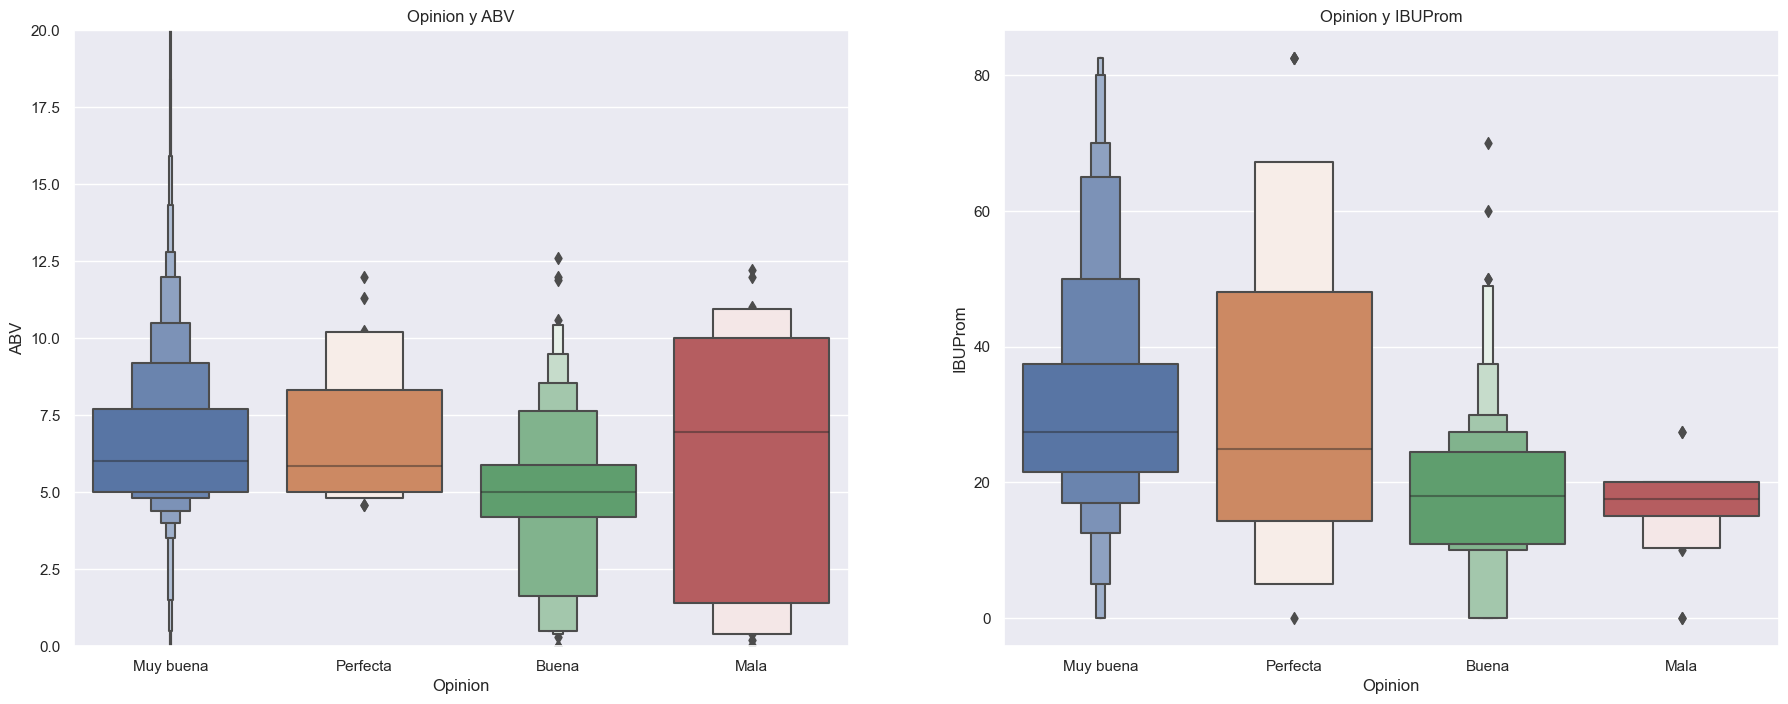

In [188]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))
sns.boxenplot(data=df, x="Opinion", y="ABV", k_depth="trustworthy",ax=axs[0])
axs[0].set_ylim(0,20)
axs[0].set_title('Opinion y ABV')
sns.boxenplot(data=df, x="Opinion", y="IBUProm", k_depth="trustworthy",ax=axs[1])
axs[1].set_title('Opinion y IBUProm');

En general se ve las opiniones con respecto a los datos mas caracteristicos de una cerveza, Alcohol% y amargura.
Viendo que las mejores, tienen un ABV muy promedio de 7%, y un ibu mayor. Posteriormente se analiza en mas profundidad.

# EDA **Outliers**

Distribucion de las variables antes de modificaciones sobre outliers

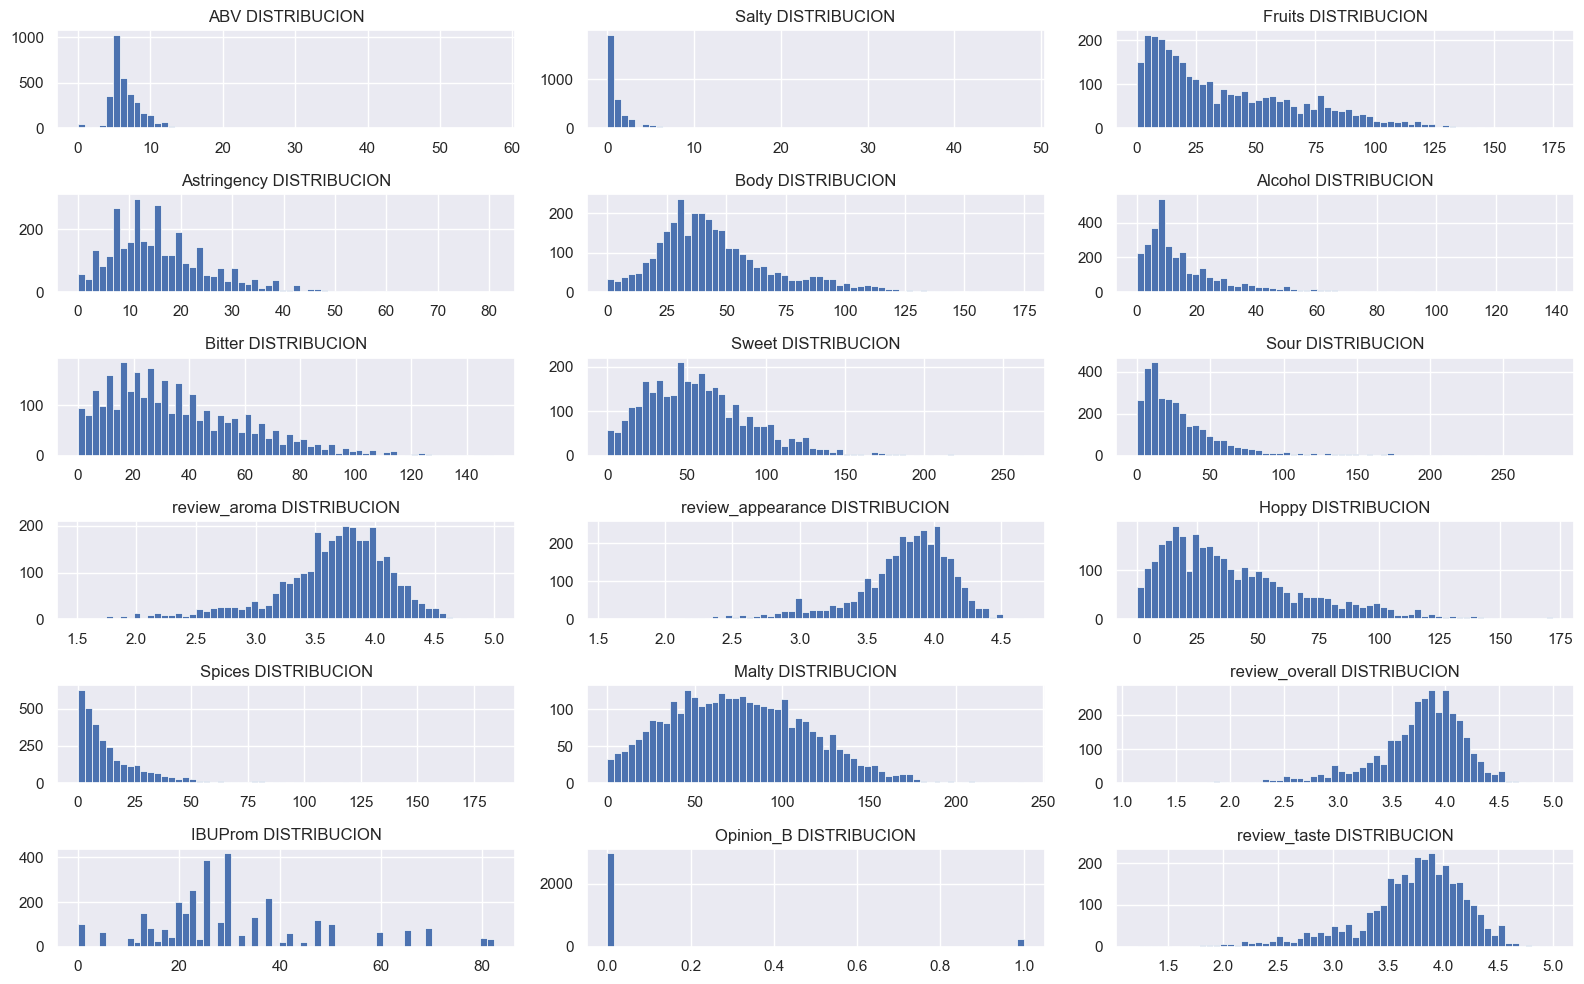

In [189]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,10))

axes[0,0].hist(df['ABV'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("ABV DISTRIBUCION");

axes[0,1].hist(df['Salty'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Salty DISTRIBUCION");

axes[0,2].hist(df['Fruits'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Fruits DISTRIBUCION");

axes[1,0].hist(df['Astringency'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Astringency DISTRIBUCION");

axes[1,1].hist(df['Body'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Body DISTRIBUCION");

axes[1,2].hist(df['Alcohol'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("Alcohol DISTRIBUCION");

axes[2,0].hist(df['Bitter'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Bitter DISTRIBUCION");

axes[2,1].hist(df['Sweet'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Sweet DISTRIBUCION");

axes[2,2].hist(df['Sour'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Sour DISTRIBUCION");

axes[3,0].hist(df['review_aroma'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("review_aroma DISTRIBUCION");

axes[3,1].hist(df['review_appearance'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("review_appearance DISTRIBUCION");

axes[3,2].hist(df['Hoppy'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Hoppy DISTRIBUCION");

axes[4,0].hist(df['Spices'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("Spices DISTRIBUCION");

axes[4,1].hist(df['Malty'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("Malty DISTRIBUCION");

axes[4,2].hist(df['review_overall'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("review_overall DISTRIBUCION");

axes[5,0].hist(df['IBUProm'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("IBUProm DISTRIBUCION");

axes[5,1].hist(df['Opinion_B'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("Opinion_B DISTRIBUCION");

axes[5,2].hist(df['review_taste'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("review_taste DISTRIBUCION");

plt.tight_layout()

In [190]:

df_out=df[['ABV','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','IBUProm','Opinion_B','Opinion_B1']]
              
def detect_outliers(df_out,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df_out[col], 25)
      #75%
      Q3 = np.percentile(df_out[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df_out[(df_out[col] < Q1 - outlier_step) | (df_out[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df_out,2,['ABV','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','IBUProm','Opinion_B','Opinion_B1'])
      #Drop outliers
df_out1 = df_out.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

OPINION, CANTIDAD Y PORCENTAJES **ANTES DE ELIMINAR OUTLIERS*

In [191]:
total_Opinion = df['Opinion'].value_counts()
percentage = (df['Opinion'].value_counts() / len(df)) * 100
result = pd.concat([total_Opinion, percentage], axis=1, keys=['total', 'percentage'])
total_row = pd.Series(result['total'].sum(), name='total', index=['total'])
result = result.append(total_row)
result.loc['total', 'percentage'] = result['percentage'].sum()
result = result.rename(index={0: 'Opinión A', 1: 'Opinión B', 'total': 'Total'})
result.head(10)

,total,percentage
Muy buena,2936,91.84
Buena,219,6.85
Perfecta,24,0.75
Mala,18,0.56
Total,3197,100.00


OPINION, CANTIDAD Y PORCENTAJES **DESPUES DE ELIMINAR OUTLIERS**

In [192]:
total_Opinion = df_out1['Opinion_B1'].value_counts()
percentage = (df_out1['Opinion_B1'].value_counts() / len(df_out1)) * 100
result = pd.concat([total_Opinion, percentage], axis=1, keys=['total', 'percentage'])
total_row = pd.Series(result['total'].sum(), name='total', index=['total'])
result = result.append(total_row)
result.loc['total', 'percentage'] = result['percentage'].sum()
result = result.rename(index={2: 'Muy buena', 1: 'Perfecta', 3: 'Muy mala', 'total': 'Total'})
result.head(10)

,total,percentage
Muy buena,2799,98.80
Perfecta,17,0.60
Muy mala,17,0.60
Total,2833,100.00


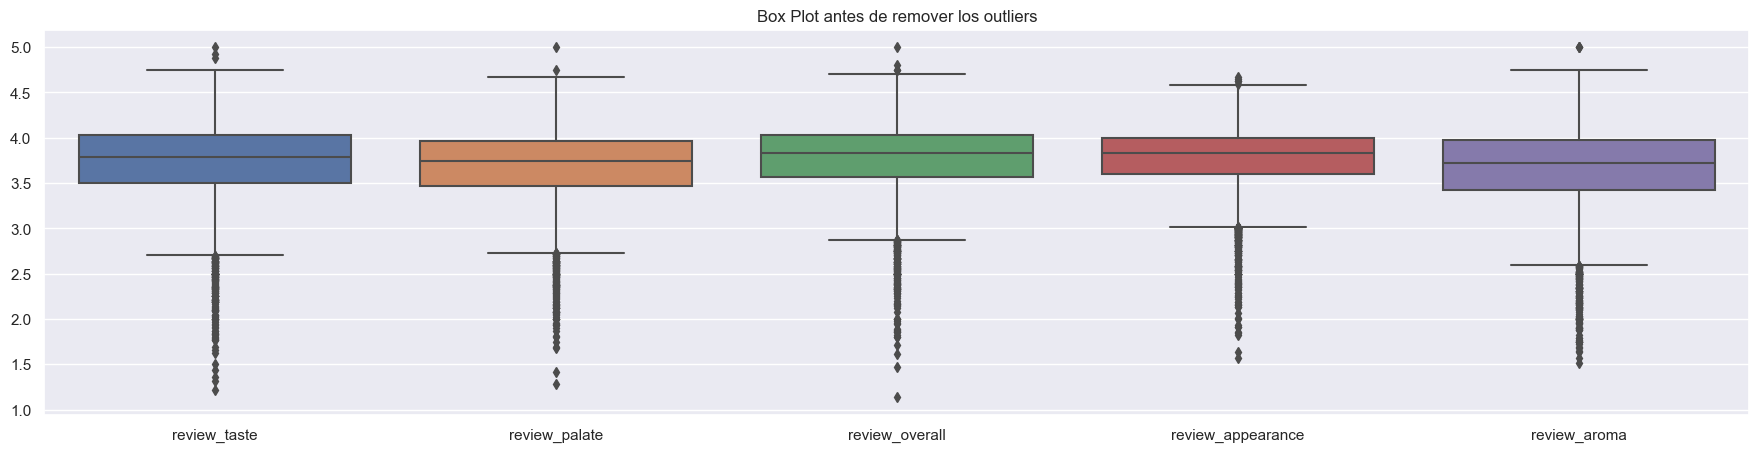

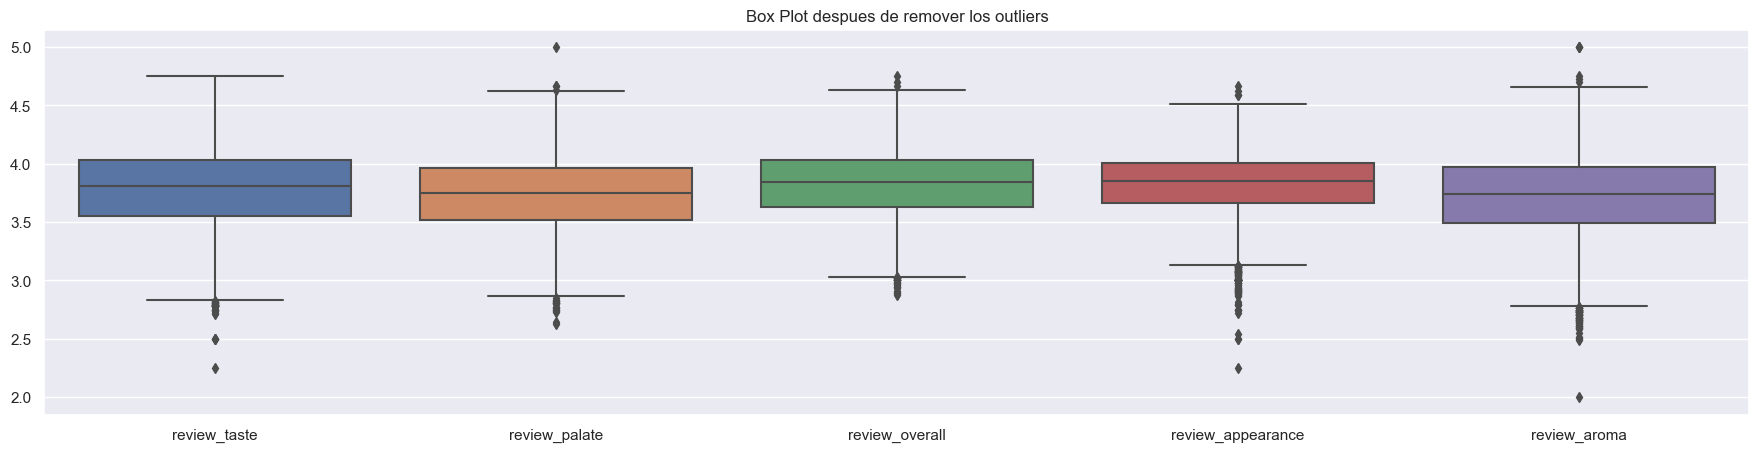

In [193]:
df_reviews = df[['review_taste','review_palate','review_overall','review_appearance','review_aroma']]
df_reviews_out1 = df_out1[['review_taste','review_palate','review_overall','review_appearance','review_aroma']]


plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews_out1)
plt.title("Box Plot despues de remover los outliers")
plt.show()

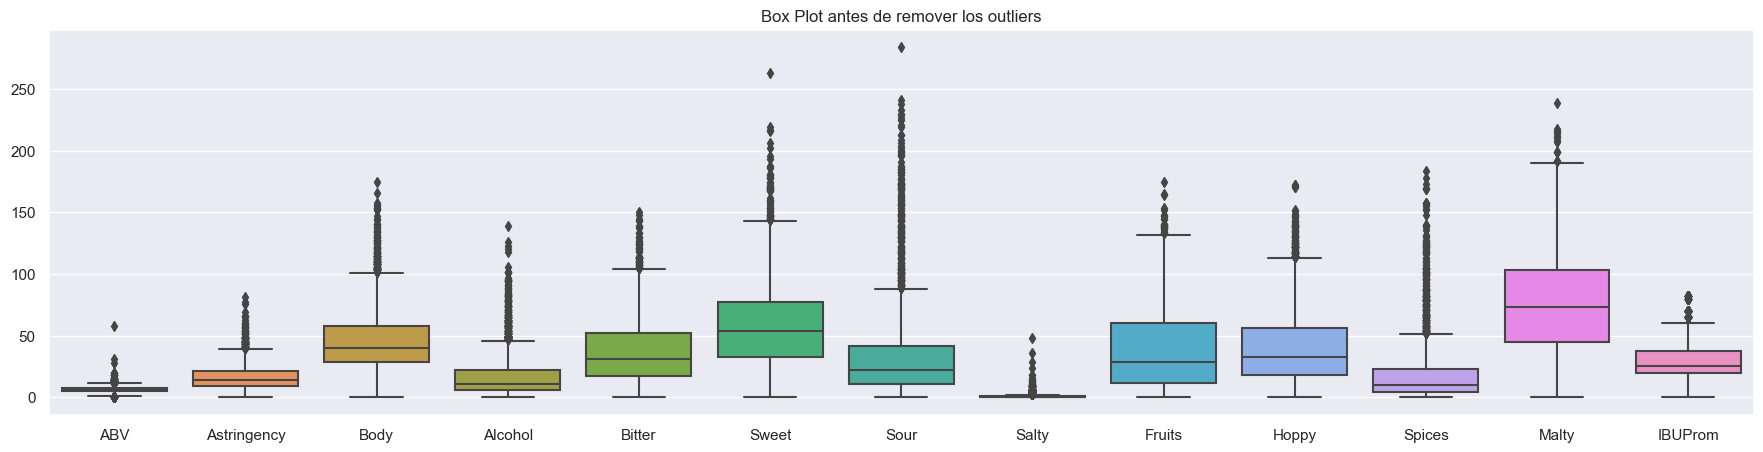

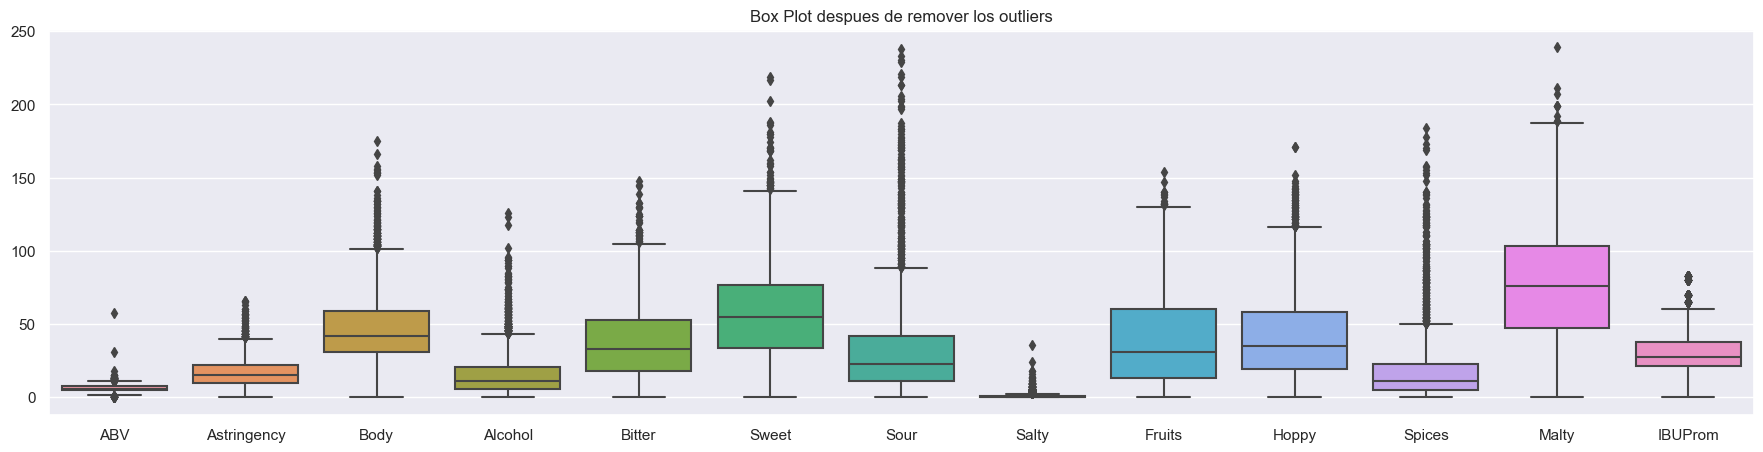

In [194]:
df_no_reviews = df.drop(columns=['review_taste','review_palate','review_overall','review_appearance','review_aroma','number_of_reviews','Min IBU','Max IBU','Opinion_B','Opinion_B1'])
df_no_reviews_out1 = df_out1.drop(columns=['review_taste','review_palate','review_overall','review_appearance','review_aroma','Opinion_B','Opinion_B1'])


plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_reviews)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_reviews_out1)
plt.title("Box Plot despues de remover los outliers")
plt.show()

# EDA **Opiniones y ABV, sabores, composicion. Respuestas a interrogantes** 

De las variables numéricas, algunas pueden ser consideradas como variables continuas (ABV, Astringency, Body, Alcohol, Bitter, Sweet, Sour, Fruits, Hoppy, Spices, Malty, review_aroma, review_appearance, review_palate, review_taste, review_overall, IBUProm) y otras pueden ser consideradas como variables discretas (Min IBU, Max IBU, number_of_reviews).

Para variables continuas, se podría utilizar la correlación de Pearson si se cumple el supuesto de normalidad. Sin embargo, es necesario realizar pruebas estadísticas para verificar si se cumple este supuesto.

Si se sospecha que las variables no son normales, se puede utilizar la correlación de Spearman o Kendall, ya que estas no requieren que las variables tengan una distribución normal.

**Distribucion de las columnas sin los outliers:**

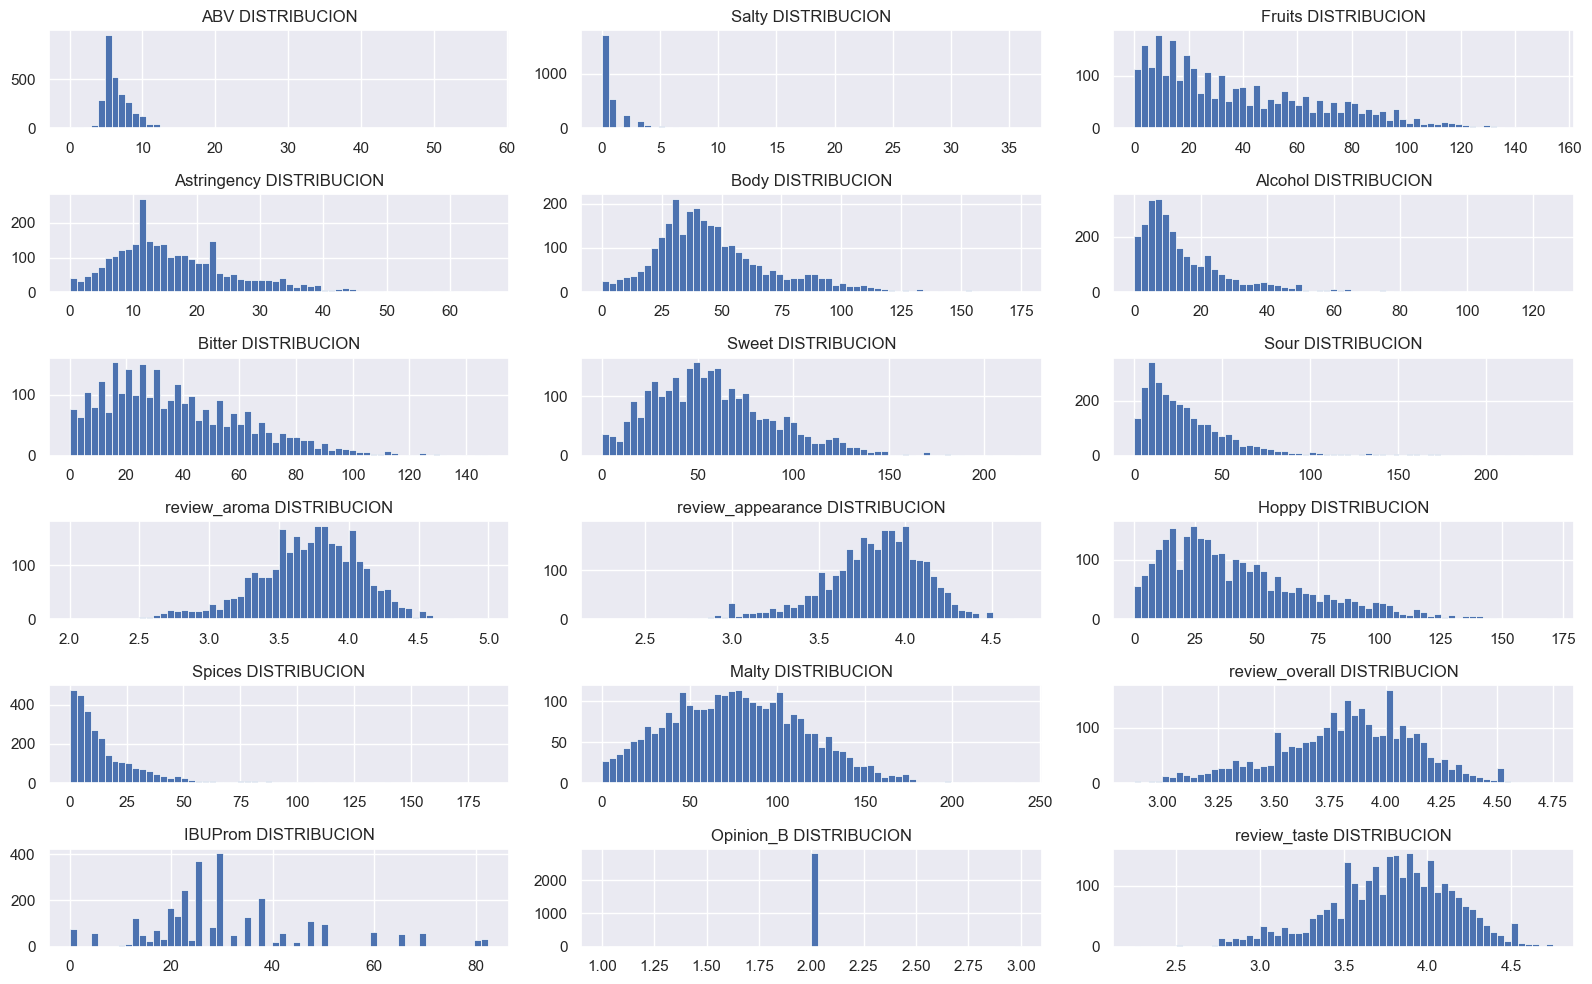

In [195]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,10))

axes[0,0].hist(df_out1['ABV'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("ABV DISTRIBUCION");

axes[0,1].hist(df_out1['Salty'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Salty DISTRIBUCION");

axes[0,2].hist(df_out1['Fruits'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Fruits DISTRIBUCION");

axes[1,0].hist(df_out1['Astringency'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Astringency DISTRIBUCION");

axes[1,1].hist(df_out1['Body'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Body DISTRIBUCION");

axes[1,2].hist(df_out1['Alcohol'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("Alcohol DISTRIBUCION");

axes[2,0].hist(df_out1['Bitter'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Bitter DISTRIBUCION");

axes[2,1].hist(df_out1['Sweet'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Sweet DISTRIBUCION");

axes[2,2].hist(df_out1['Sour'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Sour DISTRIBUCION");

axes[3,0].hist(df_out1['review_aroma'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("review_aroma DISTRIBUCION");

axes[3,1].hist(df_out1['review_appearance'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("review_appearance DISTRIBUCION");

axes[3,2].hist(df_out1['Hoppy'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Hoppy DISTRIBUCION");

axes[4,0].hist(df_out1['Spices'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("Spices DISTRIBUCION");

axes[4,1].hist(df_out1['Malty'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("Malty DISTRIBUCION");

axes[4,2].hist(df_out1['review_overall'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("review_overall DISTRIBUCION");

axes[5,0].hist(df_out1['IBUProm'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("IBUProm DISTRIBUCION");

axes[5,1].hist(df_out1['Opinion_B1'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("Opinion_B DISTRIBUCION");

axes[5,2].hist(df_out1['review_taste'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("review_taste DISTRIBUCION");

plt.tight_layout()

En si, no se cumple con el supuesto de normalidad en las principales variables de interes (reviews). Si bien tienen una forma semi normal, seria muy genero darle ese tratamiento, entonces se toma en cuenta el metodo Kendall.

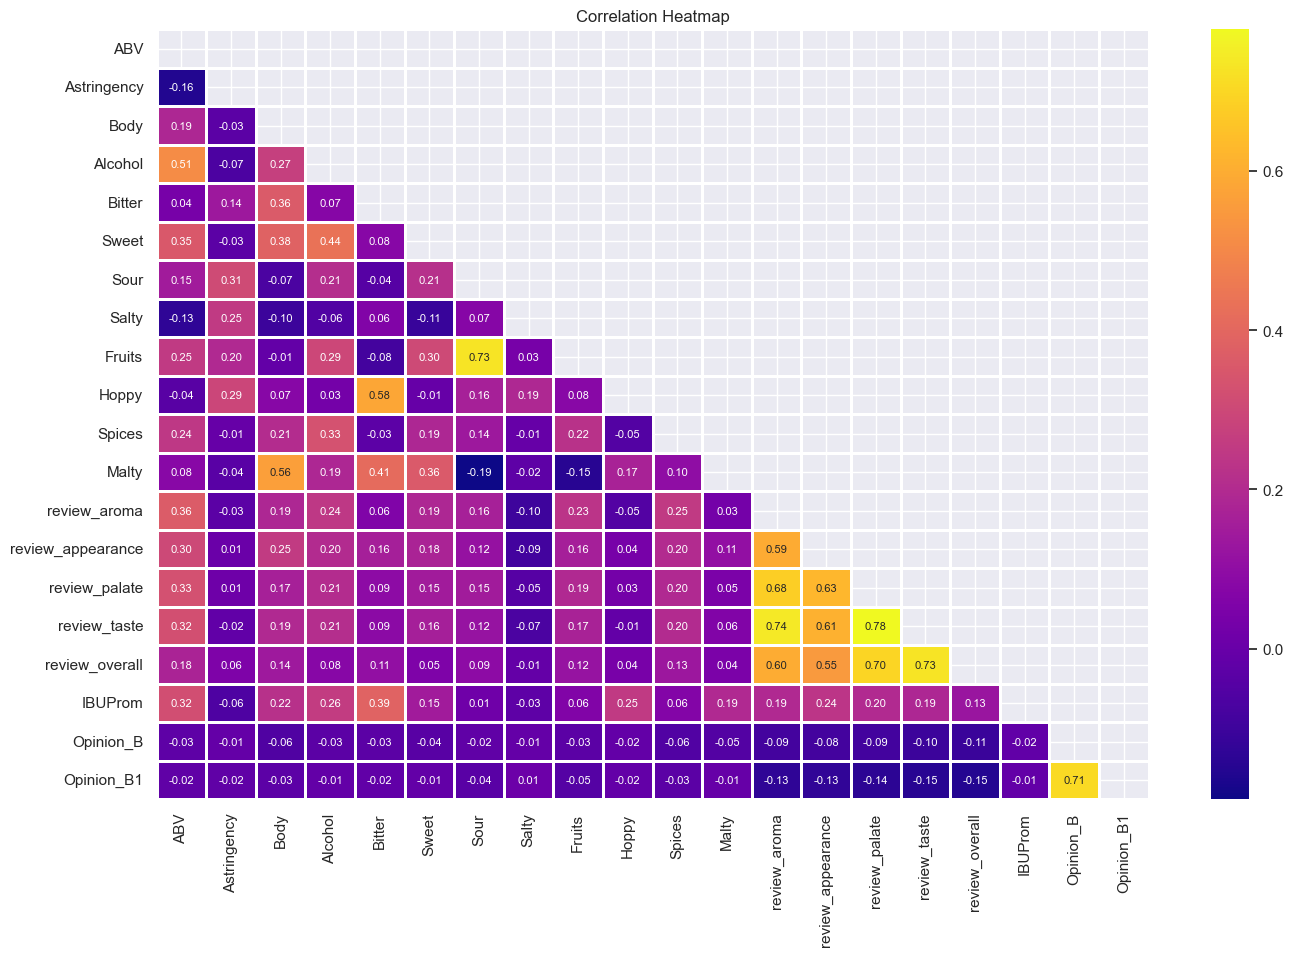

In [196]:
df_out1_corr = df_out1.corr(method='kendall')

plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(df_out1_corr, dtype=bool))
sns.heatmap(df_out1_corr, mask=mask, fmt=".2f", annot=True, lw=1, cmap='plasma', annot_kws={'size': 8})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Heatmap')
plt.show()

Relaciones mas claras, **¿Como es la relacion entre las opiniones con el ABV?**

In [197]:
review_vars = df_out1[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']]

for var in review_vars:
    lm = OLS(df_out1[var], df_out1[['ABV']]).fit()
    r_squared = lm.rsquared
    print(f"R cuadrado para la regresión lineal simple entre {var} y ABV: {r_squared:.4f}")

R cuadrado para la regresión lineal simple entre review_aroma y ABV: 0.9085
R cuadrado para la regresión lineal simple entre review_appearance y ABV: 0.9023
R cuadrado para la regresión lineal simple entre review_palate y ABV: 0.9053
R cuadrado para la regresión lineal simple entre review_taste y ABV: 0.9053
R cuadrado para la regresión lineal simple entre review_overall y ABV: 0.8952


**¿Y la relacion entre las opiniones y el gusto dulce?**

In [198]:
for var in review_vars:
    lm = OLS(df_out1[var], df_out1[['Sweet']]).fit()
    r_squared = lm.rsquared
    print(f"R cuadrado para la regresión lineal simple entre {var} y Sweet: {r_squared:.4f}")

R cuadrado para la regresión lineal simple entre review_aroma y Sweet: 0.7813
R cuadrado para la regresión lineal simple entre review_appearance y Sweet: 0.7782
R cuadrado para la regresión lineal simple entre review_palate y Sweet: 0.7758
R cuadrado para la regresión lineal simple entre review_taste y Sweet: 0.7772
R cuadrado para la regresión lineal simple entre review_overall y Sweet: 0.7657


**¿Y la relacion entre las opiniones y el amargo?**

In [199]:
for var in review_vars:
    lm = OLS(df_out1[var], df_out1[['Bitter']]).fit()
    r_squared = lm.rsquared
    print(f"R cuadrado para la regresión lineal simple entre {var} y Bitter: {r_squared:.4f}")

R cuadrado para la regresión lineal simple entre review_aroma y Bitter: 0.6959
R cuadrado para la regresión lineal simple entre review_appearance y Bitter: 0.7045
R cuadrado para la regresión lineal simple entre review_palate y Bitter: 0.6971
R cuadrado para la regresión lineal simple entre review_taste y Bitter: 0.6975
R cuadrado para la regresión lineal simple entre review_overall y Bitter: 0.6979


**¿Y la relacion entre las opiniones y las frutas?**

In [200]:
for var in review_vars:
    lm = OLS(df_out1[var], df_out1[['Fruits']]).fit()
    r_squared = lm.rsquared
    print(f"R cuadrado para la regresión lineal simple entre {var} y Fruits: {r_squared:.4f}")

R cuadrado para la regresión lineal simple entre review_aroma y Fruits: 0.6411
R cuadrado para la regresión lineal simple entre review_appearance y Fruits: 0.6271
R cuadrado para la regresión lineal simple entre review_palate y Fruits: 0.6316
R cuadrado para la regresión lineal simple entre review_taste y Fruits: 0.6318
R cuadrado para la regresión lineal simple entre review_overall y Fruits: 0.6232


**¿y la relacion entre las opiniones con el gusto agrio?**

In [201]:
for var in review_vars:
    lm = OLS(df_out1[var], df_out1[['Sour']]).fit()
    r_squared = lm.rsquared
    print(f"R cuadrado para la regresión lineal simple entre {var} y Sour: {r_squared:.4f}")

R cuadrado para la regresión lineal simple entre review_aroma y Sour: 0.5162
R cuadrado para la regresión lineal simple entre review_appearance y Sour: 0.5045
R cuadrado para la regresión lineal simple entre review_palate y Sour: 0.5092
R cuadrado para la regresión lineal simple entre review_taste y Sour: 0.5093
R cuadrado para la regresión lineal simple entre review_overall y Sour: 0.5042


**¿y la relacion entre las opiniones con las especias?**

In [202]:
for var in review_vars:
    lm = OLS(df_out1[var], df_out1[['Spices']]).fit()
    r_squared = lm.rsquared
    print(f"R cuadrado para la regresión lineal simple entre {var} y Spices: {r_squared:.4f}")

R cuadrado para la regresión lineal simple entre review_aroma y Spices: 0.4081
R cuadrado para la regresión lineal simple entre review_appearance y Spices: 0.3966
R cuadrado para la regresión lineal simple entre review_palate y Spices: 0.3972
R cuadrado para la regresión lineal simple entre review_taste y Spices: 0.4004
R cuadrado para la regresión lineal simple entre review_overall y Spices: 0.3902


**Entonces, en orden de influencia en las opiniones, queda:**


1.   ABV
2.   Sweet
3.   Bitter
4.   Fruits
5.   Sour
5.   Spices



**Distribucion de los ingredientes en las cervezas con las puntuacion de mas de 3.5 puntos (muy buenas y excelentes)**

In [203]:
df_out1= df_out1.assign(Style=df['Style'])
df_out1.head(1)

,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,IBUProm,Opinion_B,Opinion_B1,Style
0,5.30,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,37.50,0,2,Altbier


In [204]:
df_TOP = df_out1[(df_out1['Opinion_B'] == 0)]
df_TOP.shape

(2816, 21)

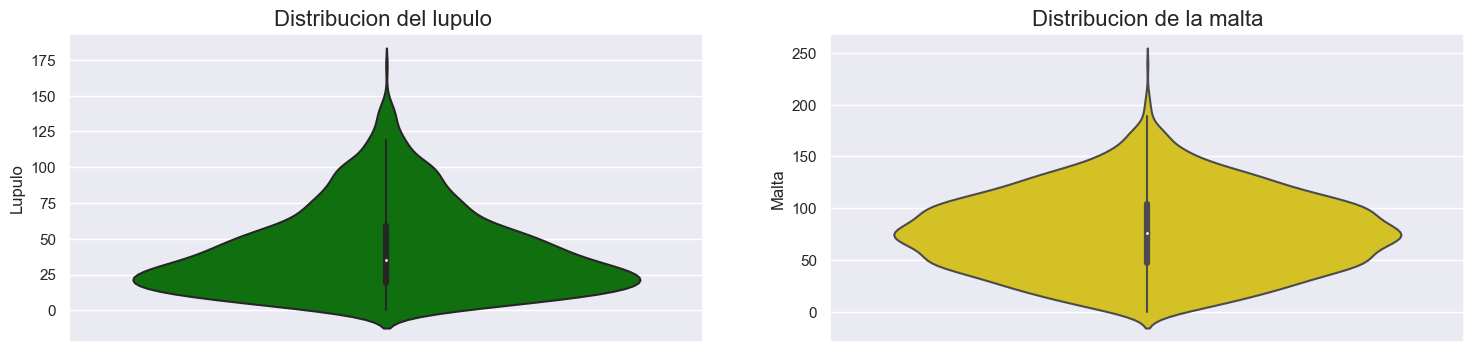

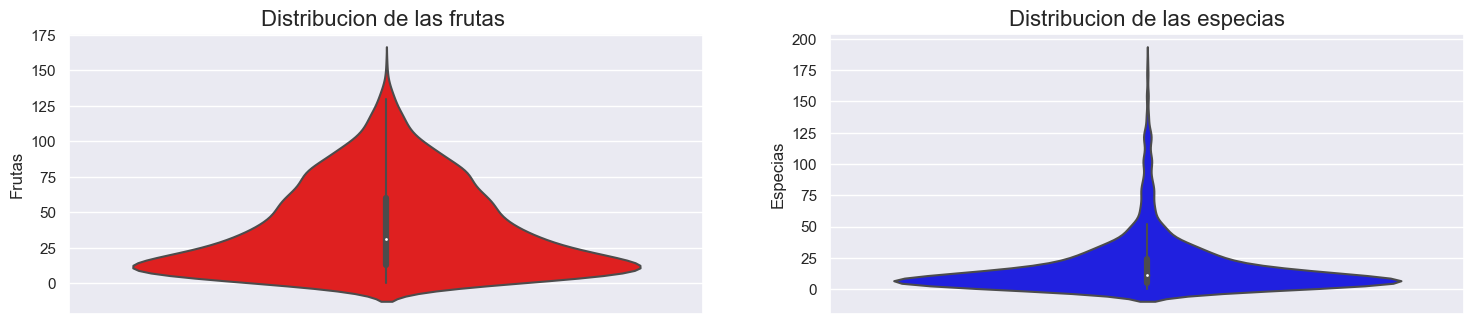

In [205]:
#Distribucion del lupulo 
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.violinplot(y=df_TOP["Hoppy"], color='green')
plt.ylabel('Lupulo', fontsize=12)
plt.title('Distribucion del lupulo ', fontsize=16);

#Distribucion de la malta
plt.subplot(122)
sns.violinplot(y=df_TOP["Malty"], color='#F1D809')
plt.ylabel('Malta', fontsize=12)
plt.title('Distribucion de la malta', fontsize=16);

#Distribucion de las frutas 
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.violinplot(y=df_TOP["Fruits"], color='red')
plt.ylabel('Frutas', fontsize=12)
plt.title('Distribucion de las frutas ', fontsize=16);

#Distribucion de las especias 
plt.subplot(222)
sns.violinplot(y=df_TOP["Spices"], color='blue')
plt.ylabel('Especias', fontsize=12)
plt.title('Distribucion de las especias', fontsize=16);

En este caso, el gráfico de violin muestra la distribución del lúpulo en un conjunto de cervezas. Si el gráfico muestra que la mayor parte del lúpulo se encuentra entre los valores 15 y 75, significa que la mayoría de las cervezas tienen una cantidad de lúpulo en ese rango. Es posible que haya algunas cervezas con cantidades de lúpulo más bajas o más altas, pero la mayoría se encuentran en ese rango. El lúpulo es un ingrediente importante en la elaboración de cerveza, ya que proporciona sabor y aroma característicos y actúa como conservante natural. La cantidad de lúpulo utilizada en la elaboración de una cerveza puede variar según el estilo y el sabor deseado.


El gráfico muestra que la mayor parte de la malta se encuentra entre los valores 40 y 130, significa que la mayoría de las cervezas tienen una cantidad de malta en ese rango. Es posible que haya algunas cervezas con cantidades de malta más bajas o más altas, pero la mayoría se encuentran en ese rango.


El gráfico de violin muestra que la mayor parte de las frutas (cervezas) está entre los valores 0 y 80, esto puede indicar que la mayoría de las frutas (cervezas) tienen un valor entre 0 y 80. Esto puede ser útil para entender qué tan común es que las frutas (cervezas) tengan un valor en ese rango y cómo se comparan con otros valores.


El contenido de especias de diferentes cervezas, un gráfico de violin que muestra que la mayoría de las cervezas tienen un contenido de especias entre 0 y 20 podría indicar que la mayoría de las cervezas contiene poco de este ingrediente.


**Comparaciones de estilos de cervezas y la opinion de las mismas ¿Cuales estilos gustan mas y cuales menos?**


In [206]:
df_data = pd.DataFrame(beer)
df = df_data[['Style','ABV','IBUProm','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','Opinion']]
df.head(1)

,Style,ABV,IBUProm,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,Opinion
0,Altbier,5.30,37.50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,Muy buena


Vemos las opiniones segun los estilos de cervezas, con la idea de seleccionar los estilo mas puntuados con los menos gustados para hacer asi comparaciones de gustos.

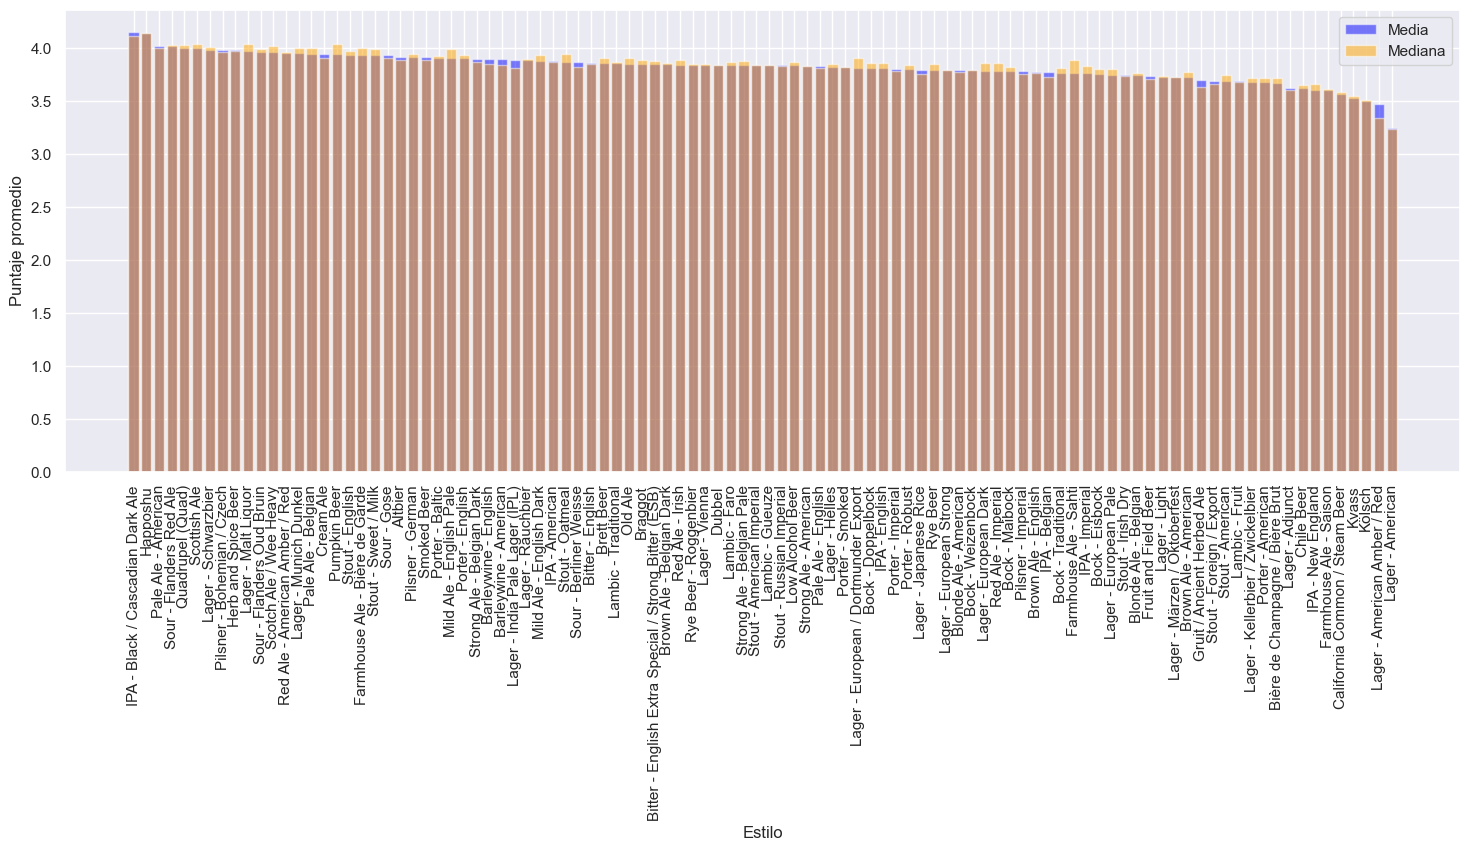

In [207]:
df_stats = df_out1.groupby('Style')['review_overall'].agg(['mean', 'median']).sort_values('mean', ascending=False)

fig, ax = plt.subplots(figsize=(18, 6))

ax.bar(df_stats.index, df_stats['mean'], color='blue', alpha=0.5, label='Media')
ax.bar(df_stats.index, df_stats['median'], color='orange', alpha=0.5, label='Mediana')

ax.set_xticklabels(df_stats.index, rotation=90)
ax.set_xlabel('Estilo')
ax.set_ylabel('Puntaje promedio')

ax.legend()
plt.show()

In [208]:
print('En orden de puntuacion mas alta:', df_out1.groupby('Style')['review_overall'].mean().sort_values(ascending=False).head(2))

En orden de puntuacion mas alta: Style
IPA - Black / Cascadian Dark Ale   4.16
Happoshu                           4.15
Name: review_overall, dtype: float64


In [209]:
print('En orden de puntuacion mas baja:', df_out1.groupby('Style')['review_overall'].mean().sort_values(ascending=True).head(2))

En orden de puntuacion mas baja: Style
Lager - American               3.24
Lager - American Amber / Red   3.47
Name: review_overall, dtype: float64


In [210]:
print('Cantidad de opiniones sobre IPA - Black / Cascadian Dark Ale:', df_out1.loc[df_out1['Style'] == 'IPA - Black / Cascadian Dark Ale'].shape[0])
print('Cantidad de opiniones sobre Happoshu:', df_out1.loc[df_out1['Style'] == 'Happoshu'].shape[0])
print('Cantidad de opiniones sobre Lager - American Amber / Red:', df_out1.loc[df_out1['Style'] == 'Lager - American Amber / Red'].shape[0])
print('Cantidad de opiniones sobre Lager - American:', df_out1.loc[df_out1['Style'] == 'Lager - American'].shape[0])

Cantidad de opiniones sobre IPA - Black / Cascadian Dark Ale: 23
Cantidad de opiniones sobre Happoshu: 23
Cantidad de opiniones sobre Lager - American Amber / Red: 34
Cantidad de opiniones sobre Lager - American: 22


In [211]:
#Seleccion de cervezas mas puntuadas y menos puntuadas y vista de cantidad.
df_LAB = df_out1[(df_out1['Style'] == 'IPA - Black / Cascadian Dark Ale') | (df_out1['Style'] == 'Happoshu') | (df_out1['Style'] == 'Lager - American Amber / Red') | (df_out1['Style'] == 'Lager - American')]
df_LAB.shape

(102, 21)

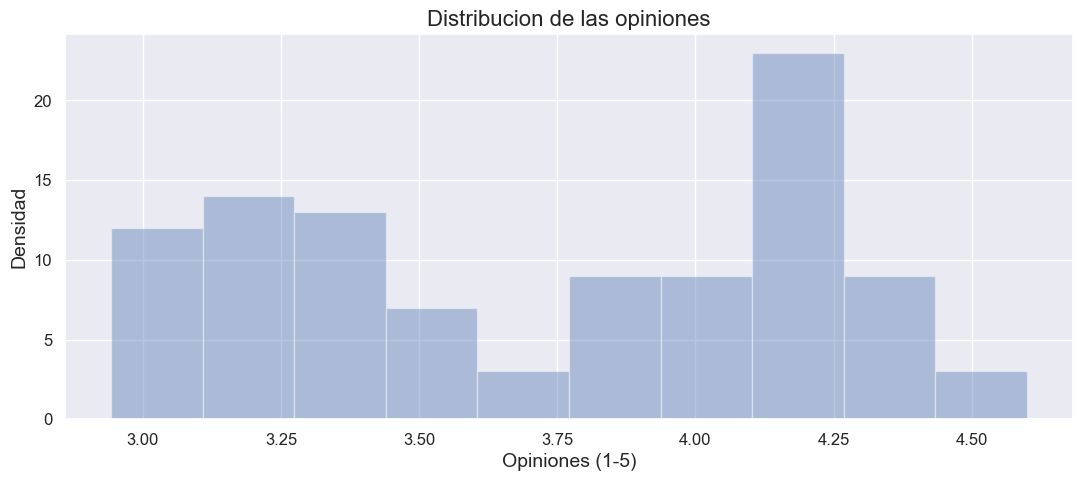

In [212]:
#Distribucion con la forma esperada
plt.figure(figsize=(13,5))
x = df_LAB['review_overall']

sns.distplot(x, bins=10, kde=False)
plt.title('Distribucion de las opiniones', fontsize=16)
plt.xlabel('Opiniones (1-5)', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Densidad', fontsize=14)
plt.yticks(fontsize=12)
plt.show();

In [213]:
#Para trabajar de manera mas organizada
df_IPABlackCascadianDarkAle = df_out1[df_out1['Style'] == 'IPA - Black / Cascadian Dark Ale']
df_Happoshu = df_out1[df_out1['Style'] == 'Happoshu']
df_LagerAmericanAmberRed = df_out1[df_out1['Style'] == 'Lager - American Amber / Red']
df_LagerAmerican = df_out1[df_out1['Style'] == 'Lager - American']

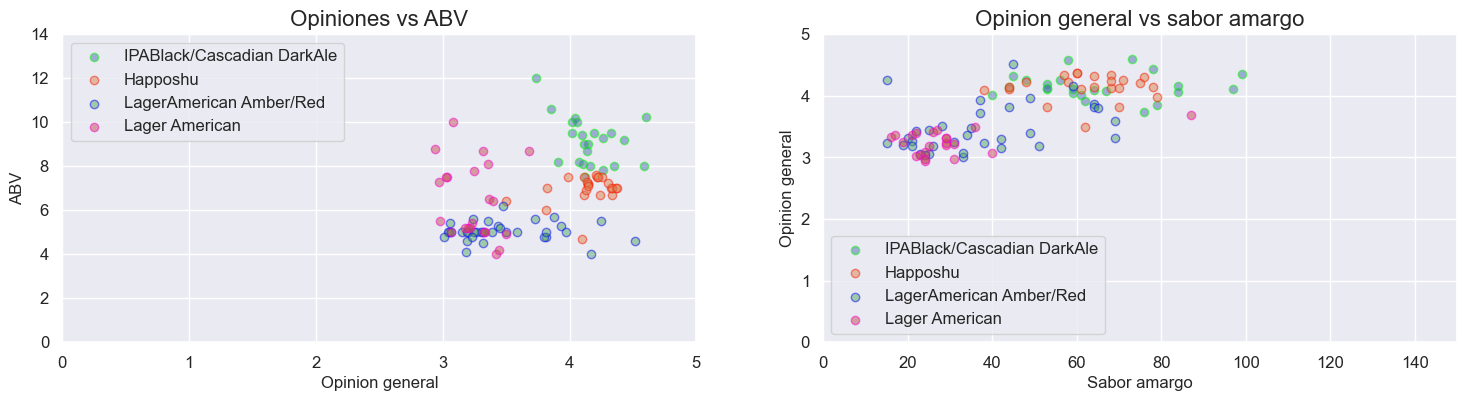

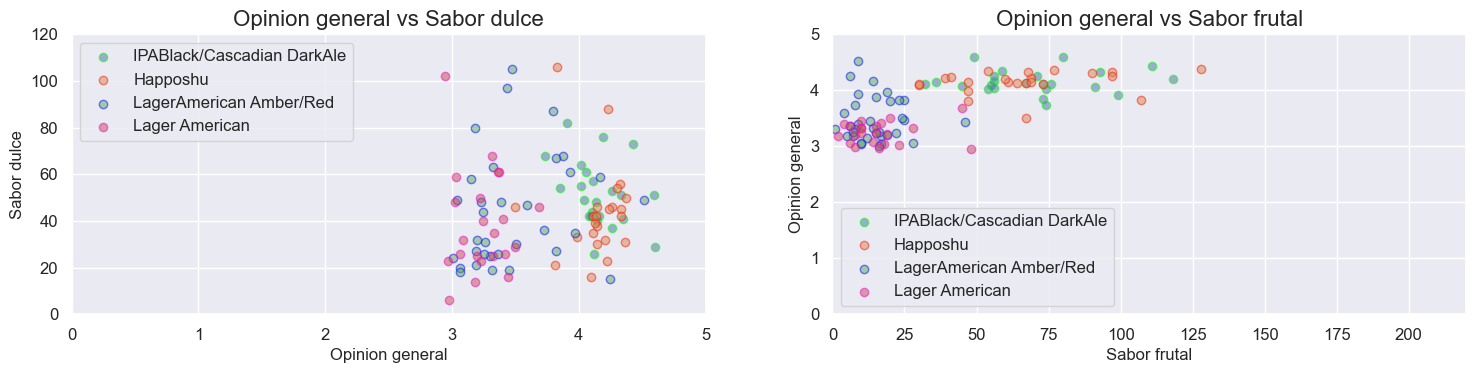

In [214]:
#Opiniones vs ABV
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_IPABlackCascadianDarkAle['review_overall'], df_IPABlackCascadianDarkAle['ABV'], edgecolor='#04F801', alpha=0.5, label= 'IPABlack/Cascadian DarkAle')
plt.scatter(df_Happoshu['review_overall'], df_Happoshu['ABV'], edgecolor='#F81B01', alpha=0.5, label= 'Happoshu')
plt.scatter(df_LagerAmericanAmberRed['review_overall'], df_LagerAmericanAmberRed['ABV'], edgecolor='#0104F8', alpha=0.5, label= 'LagerAmerican Amber/Red')
plt.scatter(df_LagerAmerican['review_overall'], df_LagerAmerican['ABV'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.ylim(0, 14)
plt.yticks(fontsize=12)
plt.ylabel('ABV', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs ABV', fontsize=16);

#Opiniones vs sabor amargo
plt.subplot(122)
plt.scatter(df_IPABlackCascadianDarkAle['Bitter'], df_IPABlackCascadianDarkAle['review_overall'], edgecolor='#04F801', alpha=0.5, label= 'IPABlack/Cascadian DarkAle')
plt.scatter(df_Happoshu['Bitter'], df_Happoshu['review_overall'], edgecolor='#F81B01', alpha=0.5, label= 'Happoshu')
plt.scatter(df_LagerAmericanAmberRed['Bitter'], df_LagerAmericanAmberRed['review_overall'], edgecolor='#0104F8', alpha=0.5, label= 'LagerAmerican Amber/Red')
plt.scatter(df_LagerAmerican['Bitter'], df_LagerAmerican['review_overall'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 150)
plt.xlabel('Sabor amargo', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 5)
plt.ylabel('Opinion general', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs sabor amargo', fontsize=16)

#Opiniones vs sabor dulce
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_IPABlackCascadianDarkAle['review_overall'], df_IPABlackCascadianDarkAle['Sweet'], edgecolor='#04F801', alpha=0.5, label= 'IPABlack/Cascadian DarkAle')
plt.scatter(df_Happoshu['review_overall'], df_Happoshu['Sweet'], edgecolor='#F81B01', alpha=0.5, label= 'Happoshu')
plt.scatter(df_LagerAmericanAmberRed['review_overall'], df_LagerAmericanAmberRed['Sweet'], edgecolor='#0104F8', alpha=0.5, label= 'LagerAmerican Amber/Red')
plt.scatter(df_LagerAmerican['review_overall'], df_LagerAmerican['Sweet'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 120)
plt.ylabel('Sabor dulce', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs Sabor dulce', fontsize=16)

#Opiniones vs sabor frutal
plt.subplot(222)
plt.scatter(df_IPABlackCascadianDarkAle['Fruits'], df_IPABlackCascadianDarkAle['review_overall'], edgecolor='#04F801', alpha=0.5, label= 'IPABlack/Cascadian DarkAle')
plt.scatter(df_Happoshu['Fruits'], df_Happoshu['review_overall'], edgecolor='#F81B01', alpha=0.5, label= 'Happoshu')
plt.scatter(df_LagerAmericanAmberRed['Fruits'], df_LagerAmericanAmberRed['review_overall'], edgecolor='#0104F8', alpha=0.5, label= 'LagerAmerican Amber/Red')
plt.scatter(df_LagerAmerican['Fruits'], df_LagerAmerican['review_overall'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 220)
plt.xlabel('Sabor frutal', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 5)
plt.ylabel('Opinion general', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs Sabor frutal', fontsize=16)
plt.show()

**En las distribuciones basadas en el estilo es donde se encuentran las diferencias.**

Las graficas muestran algunos grupos claros. Por ejemplo, hay un grupo de opiniones alrededor del rango de ABV (Alcohol By Volume) de 5-12 en la tabla de opiniones vs ABV, lo que podría deberse al hecho de que la gente prefiere esa cantidad de alcohol, porque es la cantidad que permite un control del **efecto alcohol-consumicion**. 

También hay una franja de Amargor entre 40-100 en la tabla de Opinion frente a gusto amargo, que valen 4 puntos de opinion aproximadamente. No está claro exactamente cuál proporcion de lupulo es la dominante en gusto, pero podrían ser la conjuncion con otros elementos como se ve luego (Ej. sabor dulce o agrio). También hay una franja de opiniones bajas donde existe menor menor.

En el gráfico de Opinion versus sabor dulce, hay una franja de personas que opinan que existe un gusto dulce entre 20 a 80 en las cervezas mas valoradas (opinion).

En el gráfico de Opinion versus sabor frutal,los estilos mejor puntuados tienen un alto nivel frutal entre 25 y 125.

**EN CONCLUSION:**

1.  **IPABlack/Cascadian DarkAle:** el ABV entre 8% y 12%, el sabor amargo entre 40 y 100, un sabor dulce entre 25 y 80, y un sabor frutal entre 30 y 120. Es la clave para la cerveza de mejor puntuacion.
DULCE, muy FRUTAL, AMARGA. ALCOHOL PROMEDIO-alto.

2.   **Happoshu:** el ABV entre 4% y 8%, el sabor amargo entre 30 y 80, un sabor dulce entre 20 y 60, y un sabor frutal entre 30 y 120. Es la clave para la  2da cerveza de mejor puntuacion.
Semi-DULCE, semi-AMARGA, muy FRUTAL. ALCOHOL PROMEDIO.

3.   **LagerAmerican Amber/Red:** el ABV entre 4% y 6%, el sabor amargo entre 20 y 70, un sabor dulce entre 20 y 100, y un sabor frutal entre 0 y 20. Es la clave para una cerveza con opinion 'negativa'.
DULCE, POCO FRUTAL, POCO AMARGA. ALCOHOL PROMEDIO.

4.   **Lager American:** el ABV entre 4% y 6%, el sabor amargo entre 20 y 40, un sabor dulce entre 20 y 50, y un sabor frutal entre 0 y 30. Es la clave para una cerveza con opinion muy negativa.
POCO DULCE, POCO FRUTAL, MEDIO AMARGO. POCO ALCOHOL.

# EDA PLUS **API de cervezas y sus precios**

In [215]:
url='https://api.sampleapis.com/beers/ale'
df31= requests.get(url)
print(df31)

<Response [200]>


In [216]:
print(len(df31.text))
df31.text;
texto3=df31.text
json.loads(texto3);

36815


In [217]:
jsondata1=json.loads(texto3)
df41=pd.DataFrame.from_dict(jsondata1)
df41.head()

,price,name,rating,image,id
0,$16.99,Founders All Day IPA,"{'average': 4.411243509154233, 'reviews': 453}",https://www.totalwine.com/media/sys_master/twm...,1
1,$13.99,Blue Moon Belgian White Belgian-Style Wheat Ale,"{'average': 4.775260833383482, 'reviews': 305}",https://www.totalwine.com/media/sys_master/twm...,2
2,$16.99,Guinness Extra Stout,"{'average': 3.9785961474594638, 'reviews': 119}",https://www.totalwine.com/media/sys_master/twm...,3
3,$8.99,Guinness Extra Stout,"{'average': 3.5135460961961718, 'reviews': 199}",https://www.totalwine.com/media/sys_master/twm...,4
4,$15.49,Sierra Nevada Pale Ale,"{'average': 4.266364643483868, 'reviews': 414}",https://www.totalwine.com/media/sys_master/twm...,5


In [218]:
df41['rating_'] = df41['rating'].transform(lambda x:x['average'])
df41['reviews'] = df41['rating'].transform(lambda x:x['reviews'])

df41["price"] = df41["price"].apply(lambda x: x.replace("$",""))

df41['price']=df41['price'].astype(float)

df51=df41[['name','price','rating_','reviews']]
df51.head()

,name,price,rating_,reviews
0,Founders All Day IPA,16.99,4.41,453
1,Blue Moon Belgian White Belgian-Style Wheat Ale,13.99,4.78,305
2,Guinness Extra Stout,16.99,3.98,119
3,Guinness Extra Stout,8.99,3.51,199
4,Sierra Nevada Pale Ale,15.49,4.27,414


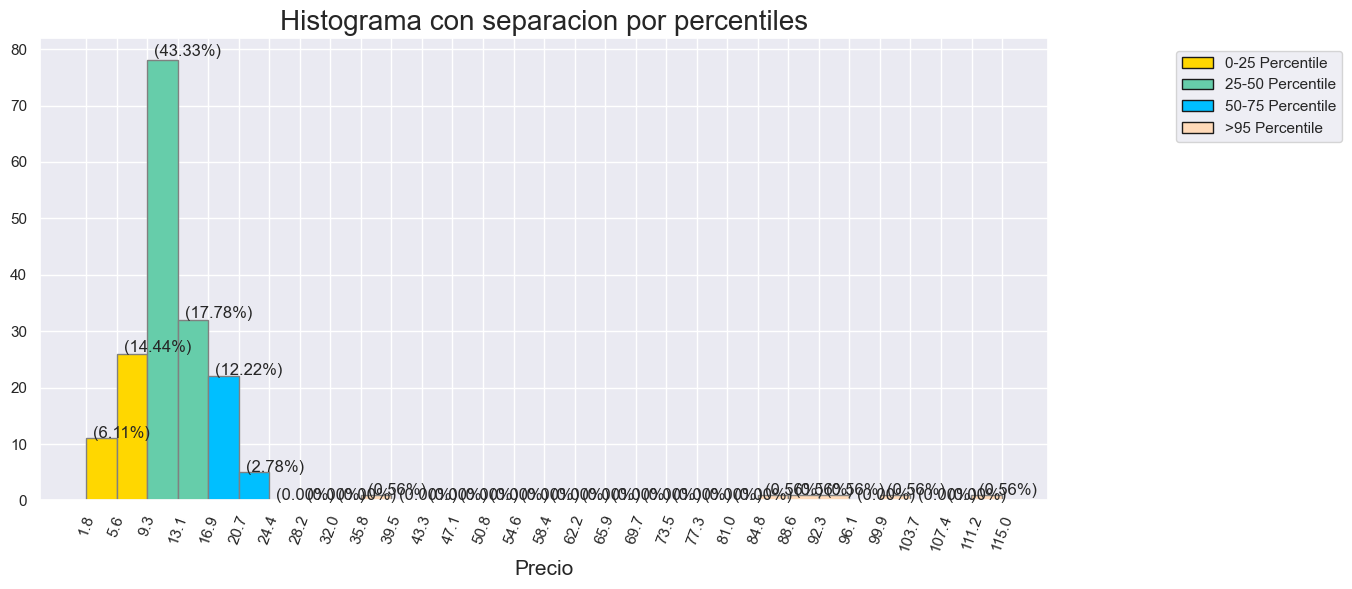

In [219]:
fig, ax = plt.subplots(figsize=(13,6))

data = df51['price']

perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

counts, bins, patches = plt.hist(data, facecolor=perc_50_colour, edgecolor='gray', bins=30)

plt.xticks(bins.round(2))
plt.xticks(rotation=70)

plt.title('Histograma con separacion por percentiles', fontsize=20)
plt.xlabel('Precio', fontsize=15)

q25, q75, q95 = np.percentile(data, [25, 75, 95])

for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

Se ven valores muy extremos posibles outliners

In [220]:
out=[]
def iqr_outliers(df51):
    q1 = df51.quantile(0.25)
    q3 = df51.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df51:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df51['price'])

Outliers: [89.99, 87.99, 36.99, 99.99, 92.99, 114.99]


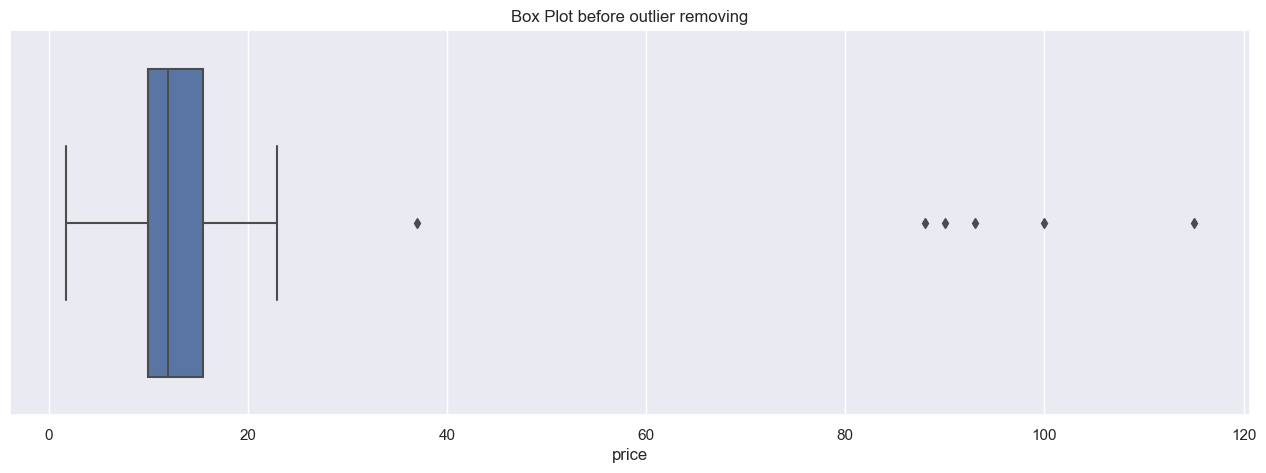

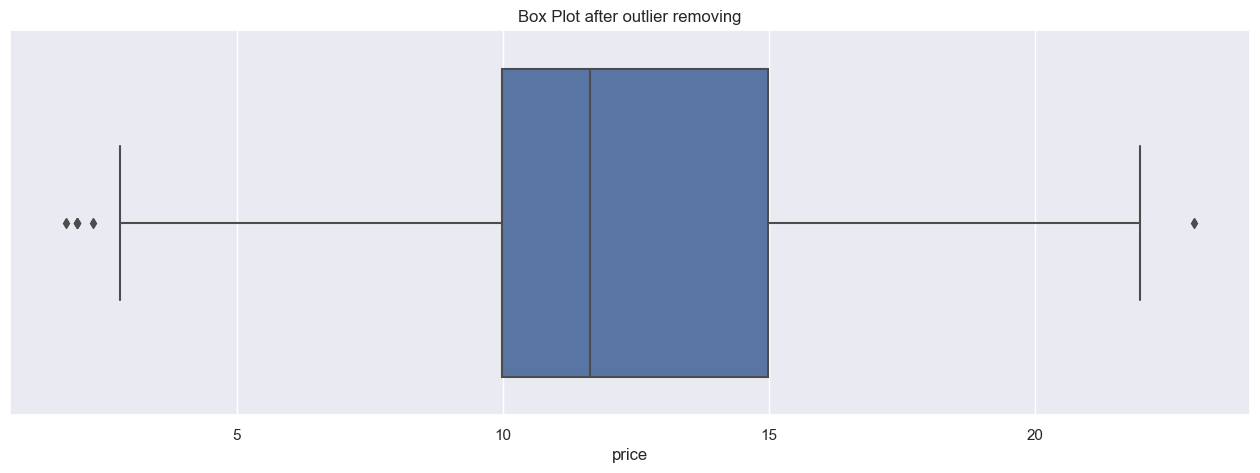

In [221]:
fig, axs = plt.subplots(figsize=(16, 5))
sns.boxplot(x=df51['price'], orient='h', ax=axs)
axs.set_title("Box Plot before outlier removing")
plt.show()

# Remove outliers
def drop_outliers(df51, field_name):
    iqr = 1.5 * (np.percentile(df51[field_name], 75) - np.percentile(df51[field_name], 25))
    df51.drop(df51[df51[field_name] > (iqr + np.percentile(df51[field_name], 75))].index, inplace=True)
    df51.drop(df51[df51[field_name] < (np.percentile(df51[field_name], 25) - iqr)].index, inplace=True)

drop_outliers(df51, 'price')

fig, axs = plt.subplots(figsize=(16, 5))
sns.boxplot(x=df51['price'], orient='h', ax=axs)
axs.set_title("Box Plot after outlier removing")
plt.show()

In [222]:
out=[]
def iqr_outliers(df51):
    q1 = df51.quantile(0.25)
    q3 = df51.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df51:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df51['price'])

Outliers: [2.29, 1.99, 22.99, 1.79, 1.99, 1.99]


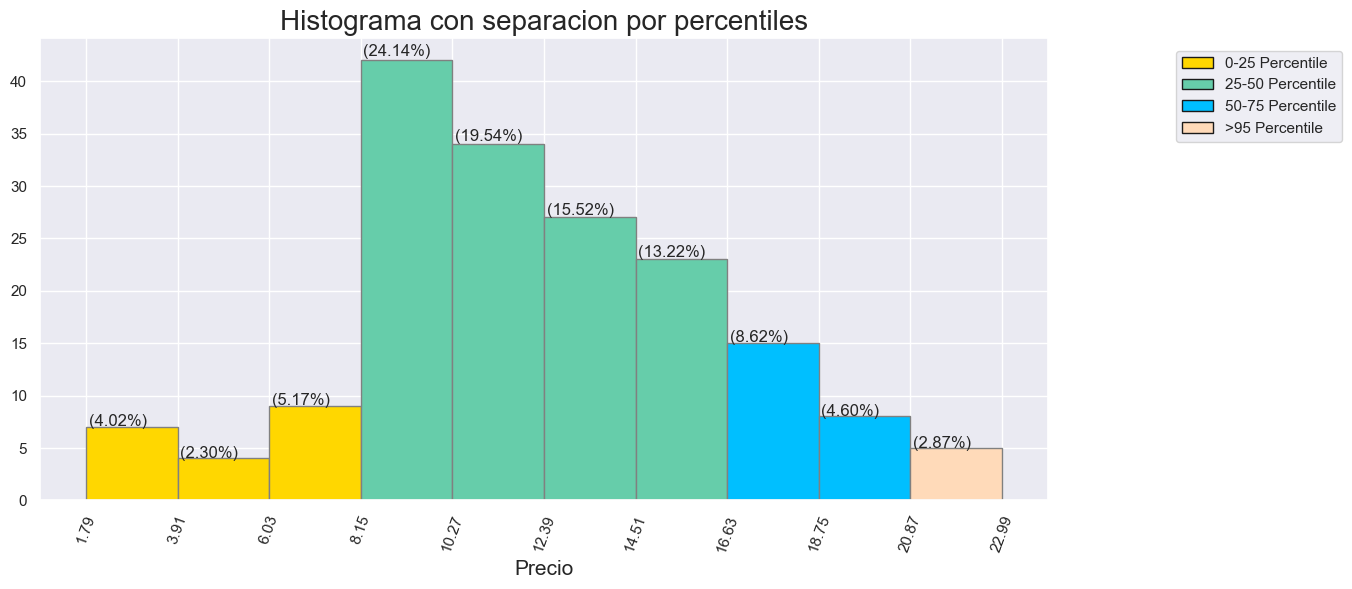

In [223]:
fig, ax = plt.subplots(figsize=(13,6))

data = df51['price']

perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

counts, bins, patches = plt.hist(data, facecolor=perc_50_colour, edgecolor='gray', bins=10)

plt.xticks(bins.round(2))
plt.xticks(rotation=70)

plt.title('Histograma con separacion por percentiles', fontsize=20)
plt.xlabel('Precio', fontsize=15)

q25, q75, q95 = np.percentile(data, [25, 75, 95])

for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

In [224]:
def dfinfo(df51):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Nulos', 'Unicos', 'Numerico'])
  for col in df51:

      data_series = df51[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df51.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df51.skew(), df51.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = dfinfo(df51)
df_uni_stats

,Cantidad,Tipo,Nulos,Unicos,Numerico,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
name,174,object,0,140,False,Founders All Day IPA,-,-,-,-,-,-,-,-,-
price,174,float64,0,43,True,-,12.23,4.24,1.79,9.99,11.64,14.99,22.99,0.01,0.20
rating_,174,float64,0,174,True,-,3.11,1.10,1.01,2.25,3.29,4.00,5.00,-0.30,-0.95
reviews,174,int64,0,147,True,-,265.81,140.09,50.00,130.50,258.00,388.00,499.00,0.02,-1.36


1. La muestra contiene información de 174 cervezas diferentes.
2. La columna "name" es de tipo objeto y no presenta valores nulos, pero tiene solamente 140 valores únicos, lo que indica que hay algunas cervezas repetidas.
3. La columna "price" es numérica, tiene un rango de valores entre 1.79 y 22.99, con una media de 12.23 y una desviación estándar de 4.24. Además, se observa un sesgo positivo en la distribución (0.01) y un nivel de apuntamiento normal (-0.20). Esto sugiere que la mayoría de las cervezas tienen precios similares, pero hay algunas cervezas con precios más altos.
4. La columna "rating_" también es numérica y tiene un rango de valores entre 1.01 y 5.00, con una media de 3.11 y una desviación estándar de 1.10. La distribución tiene un sesgo negativo (-0.30) y un nivel de apuntamiento bajo (-0.95), lo que indica que la mayoría de las cervezas tienen calificaciones altas, pero hay algunas con calificaciones bajas.
5. La columna "reviews" es numérica y tiene un rango de valores entre 50 y 499, con una media de 265.81 y una desviación estándar de 140.09. La distribución tiene un sesgo positivo (0.02) y un nivel de apuntamiento bajo (-1.36), lo que sugiere que la mayoría de las cervezas tienen una cantidad media de reseñas, pero hay algunas con una cantidad mucho mayor de reseñas.

# Pre seleccion de modelo **Lazy pred**

1. Obtencion de las variables mas representativas con una seleccion de eliminacion bidireccional.
2. Ver efectividad aproximada de varios modelos con lazy pred.
3. En caso de efectividad baja o nula, reseleccion de variables.


**Primer paso eliminacion bidireccional, SE USAN DATOS SIN OUTLIERS:**

In [225]:
df_out1.head(1)

,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,IBUProm,Opinion_B,Opinion_B1,Style
0,5.30,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,37.50,0,2,Altbier


In [226]:
X = df_out1.drop(columns = ["review_overall",'Style'])
y = df_out1['review_overall']

In [227]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
warnings.filterwarnings('ignore')
stepwise_selection(X,y)

['review_palate',
 'review_taste',
 'Alcohol',
 'ABV',
 'Opinion_B1',
 'Sweet',
 'Spices',
 'Astringency',
 'Sour',
 'Fruits',
 'Malty',
 'IBUProm',
 'review_aroma',
 'Opinion_B',
 'review_appearance',
 'Bitter',
 'Hoppy']

In [228]:
df2 = df_out1[['ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_overall']]
df2.head(1)

,ABV,Alcohol,Sweet,Spices,Astringency,Sour,Salty,Hoppy,Body,Fruits,IBUProm,Malty,review_overall
0,5.30,9,74,8,13,33,0,57,32,33,37.50,111,3.85


In [229]:
X = df2.drop(columns = ['review_overall'])     
y = df2['review_overall']    
print('Min target:', min(y), 'Max target:', max(y))

Min target: 2.875 Max target: 4.75


Entonces se seleccionaron las columnas 'ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty' para predecir 'review_overall'. 

**Segundo paso, a continuacion se ven los resultados en lazypred:**

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models, predictions = LazyRegressor().fit(X_train, X_test, y_train, y_test)
print(models[:10])

100%|██████████| 42/42 [05:10<00:00,  7.39s/it]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.23       0.25  0.27        0.29
GradientBoostingRegressor                    0.23       0.24  0.27        0.56
NuSVR                                        0.22       0.24  0.27        0.41
RandomForestRegressor                        0.22       0.24  0.27        2.06
LGBMRegressor                                0.22       0.23  0.27        0.17
ExtraTreesRegressor                          0.20       0.22  0.27        0.91
HistGradientBoostingRegressor                0.20       0.22  0.27        0.42
MLPRegressor                                 0.18       0.20  0.28        2.28
AdaBoostRegressor                            0.15       0.17  0.28        0.26
BaggingRegressor                             0.15       0.17  0.28        0.25


Malos resultados.

**Tercer paso, se vera agregando las opiniones de gusto, aroma, apariencia y sabor:**

In [231]:
df3 = df_out1[['ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_overall','review_aroma','review_palate','review_appearance','review_taste']]
df3.head(1)

,ABV,Alcohol,Sweet,Spices,Astringency,Sour,Salty,Hoppy,Body,Fruits,IBUProm,Malty,review_overall,review_aroma,review_palate,review_appearance,review_taste
0,5.30,9,74,8,13,33,0,57,32,33,37.50,111,3.85,3.50,3.56,3.64,3.64


In [232]:
X = df3.drop(columns = ['review_overall'])
y = df3['review_overall']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models, predictions = LazyRegressor().fit(X_train, X_test, y_train, y_test)
print(models[:10])

100%|██████████| 42/42 [04:51<00:00,  6.93s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.86       0.86  0.11        0.55
HuberRegressor                               0.85       0.86  0.12        0.05
LinearSVR                                    0.85       0.86  0.12        0.12
SVR                                          0.85       0.86  0.12        0.14
LGBMRegressor                                0.85       0.85  0.12        0.27
HistGradientBoostingRegressor                0.84       0.85  0.12        0.41
ExtraTreesRegressor                          0.84       0.85  0.12        0.84
Lars                                         0.84       0.85  0.12        0.02
TransformedTargetRegressor                   0.84       0.85  0.12        0.02
LinearRegression                             0.84       0.85  0.12        0.02


[(0.0, 1.0)]

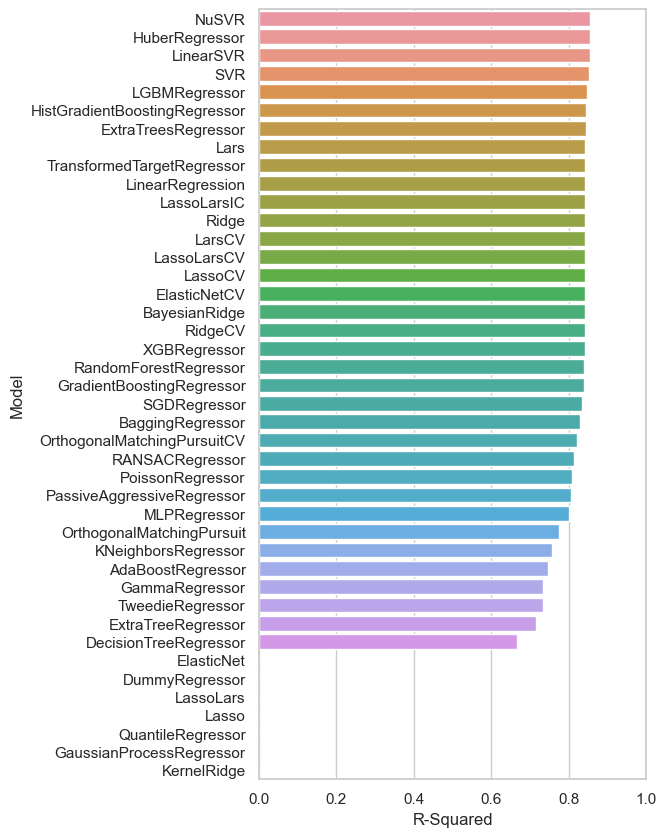

In [234]:
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

Mejores resultados, luego se podria implementar predicciones para la opinion del aroma, gusto, apariencia y sabor. A fin de ser utilizadas en la prediccion general. 


**En defininitiva se probaran 3 modelos de prediccion:**
1. LinearSVR, sin outliers.
2. HuberRegressor, esto con outliers debido a sus caracteristicas sobre el tratamiento de los mismos. 
3. Regresion lineal simple, sin outliers.

# Modelo **LinearSVR sin outliers**

Linear SVR (Support Vector Regression) es un algoritmo de regresión de vectores de soporte lineal que se utiliza para realizar tareas de regresión en conjuntos de datos. Es una variante del algoritmo SVM (Support Vector Machines) y se utiliza para problemas de regresión en los que se desea predecir un valor numérico continuo en función de un conjunto de variables predictoras.

El objetivo de Linear SVR es encontrar la línea recta que mejor se ajusta a los datos de entrada, minimizando la distancia entre la línea y los puntos de datos más cercanos. A diferencia de otros algoritmos de regresión, como la regresión lineal, Linear SVR puede manejar conjuntos de datos que no son linealmente separables.

El proceso de entrenamiento de Linear SVR implica la selección de los vectores de soporte, que son los puntos de datos más cercanos a la línea de regresión. Una vez que se han seleccionado los vectores de soporte, se puede utilizar la línea recta para predecir los valores de la variable objetivo para nuevos puntos de datos.

El rendimiento de Linear SVR se mide utilizando una métrica de error de regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²). El objetivo es minimizar el valor de la métrica de error para lograr un mejor rendimiento del modelo.

En resumen, Linear SVR es un algoritmo de regresión que utiliza una línea recta para predecir los valores de la variable objetivo a partir de las variables predictoras. El algoritmo se basa en encontrar la línea que mejor se ajusta a los datos de entrada, minimizando la distancia entre la línea y los puntos de datos más cercanos.

In [235]:
#Verificacion de la totalidad de datos iniciales: ¿igual a 3197? --> outliers incluidos, ¿menos a 3197? --> sin outliers.
df3.shape

(2833, 17)

In [236]:
X = df3.drop(columns = ["review_overall"])
y = df3['review_overall']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = LinearSVR(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))
print('Training score:', clf.score(X_train, y_train))

Mean Absolute Error (MAE): 0.11050792684725584
Mean Squared Error (MSE): 0.02024956058722305
Root Mean Squared Error (RMSE): 0.1423009507600812
R-Squared: 0.8036256410501613
Training score: 0.7914432867716978


En este analisis un valor de 80 aprox en r2 y en el training score es aceptable. Se procede con los demas modelos.

# Modelo **HuberRegressor con outliers**

El HuberRegressor, utiliza una función de pérdida llamada "huber loss" que es menos sensible a los valores atípicos. Huber loss es similar al MSE para valores cercanos a cero, pero es menos sensible a los valores extremos. Esto significa que el HuberRegressor es menos propenso a ser influenciado por los valores atípicos en los datos de entrenamiento.

Algo importante es que el HuberRegressor es una mezcla entre la regresión lineal y la regresión robusta, es decir se adapta mejor a datos con outliers. Otra ventaja del HuberRegressor es que es menos sensible a los cambios en la escala de los datos, ya que utiliza una función de pérdida que es menos sensible a los valores extremos.

In [238]:
#Verificacion de la totalidad de datos iniciales: ¿igual a 3197? --> outliers incluidos, ¿menos a 3197? --> sin outliers.
df.shape

(3197, 20)

In [239]:
df_hr = df[['ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_overall','review_aroma','review_palate','review_appearance','review_taste']]
X = df_hr.drop(columns = ["review_overall"])
y = df_hr['review_overall']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
huber = HuberRegressor(epsilon=1.35)
huber.fit(X_train, y_train)
y_pred = huber.predict(X_test)

print("Huber Regression Error:", mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))
print('Training score:', huber.score(X_train, y_train))

Huber Regression Error: 0.02942298698563467
Mean Absolute Error (MAE): 0.11314616719330295
Mean Squared Error (MSE): 0.02942298698563467
Root Mean Squared Error (RMSE): 0.17153130030882022
R-Squared: 0.851761103286502
Training score: 0.8458071688467161


Valores mas aceptables. Se prosigue con el ultimo modelo.

# Modelo definitivo **Regresion lineal sin outliers**

la regresión lineal es un modelo de aprendizaje automático supervisado utilizado para predecir una variable de respuesta continua a partir de una o más variables predictoras. El objetivo es encontrar la relación lineal que mejor se ajusta a los datos de entrada y utilizarla para hacer predicciones precisas en nuevos datos.

La regresión lineal busca minimizar el error cuadrático medio (MSE) entre las predicciones y los valores reales. Esto significa que la regresión lineal es sensible a los valores atípicos (outliers) en los datos de entrenamiento, ya que estos valores tienen un gran impacto en el MSE.

In [241]:
#Verificacion de la totalidad de datos iniciales: ¿igual a 3197? --> outliers incluidos, ¿menos a 3197? --> sin outliers.
df3.shape

(2833, 17)

In [242]:
X = df3.drop(columns = ["review_overall"])
y = df3['review_overall']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Regresion lineal Error:", mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))
print('Training score:', lr.score(X_train, y_train))

Regresion lineal Error: 0.013286498964849021
Mean Absolute Error (MAE): 0.08088548704647859
Mean Squared Error (MSE): 0.013286498964849021
Root Mean Squared Error (RMSE): 0.11526707667347612
R-Squared: 0.8711513908822193
Training score: 0.8568373988797342


**Mejores resultados hasta el momento, se procedera con este modelo en definitiva. Se realizan mas analisis en las predicciones:**

In [244]:
dfm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfm.head(5)

,Actual,Predicted
1404,4.26,4.32
218,3.95,4.04
957,3.28,3.20
2756,3.41,3.41
2285,4.14,4.03


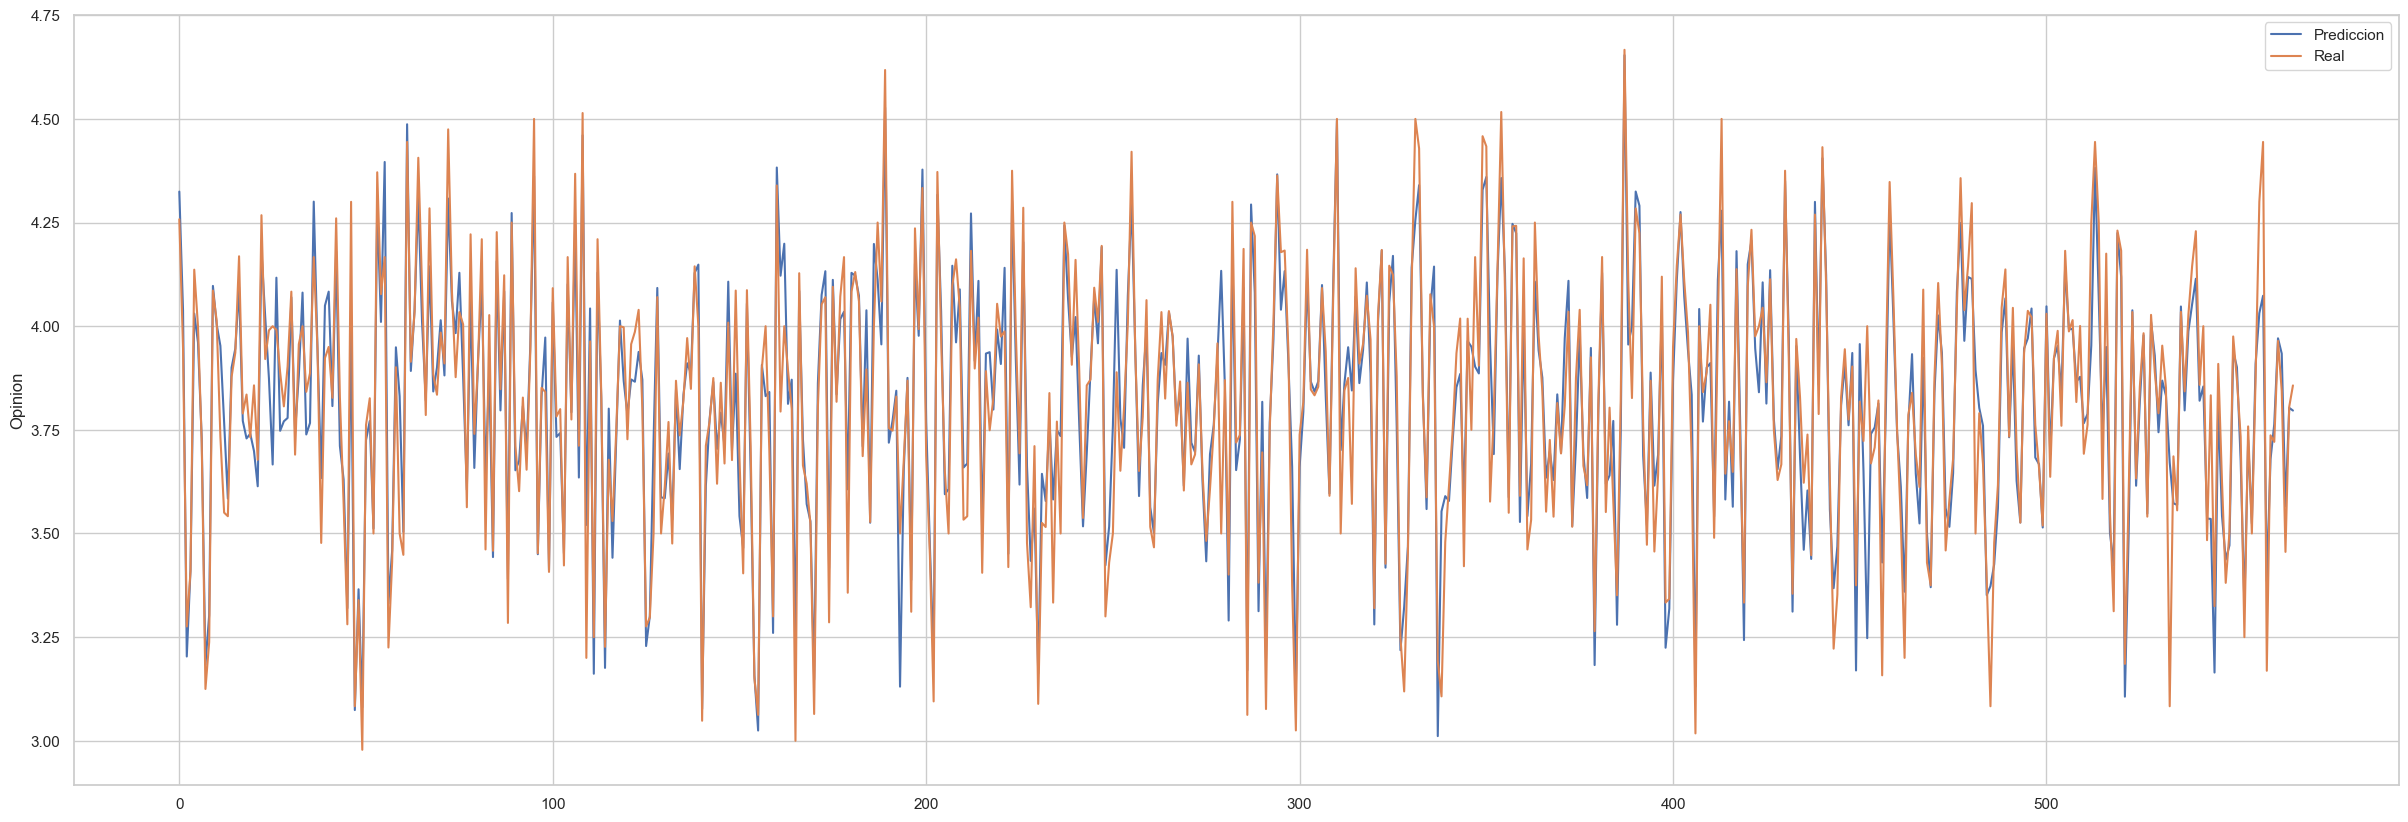

In [245]:
plt.figure(figsize = (30,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Opinion')
plt.legend()
plt.show()


# **Conclusiones finales** - **Fuentes**

A partir de dataset "beer" disponiendo de informacion acerca de mas de 3100 cervezas se lograron sacar conclusiones sobre la opinion de la gente sobre las mismas. Con el tratamiento de los outliers y lo posterior a ello.

Asi como lo que mas repercute en ellas, siendo un ejemplo el ABV. Pudiendo tambien responder interrongates.

Se vio ademas la distribucion en ingredientes de las cervezas con mayor puntuacion, pudiendo asi darnos una idea de la composicion de las birras mejor puntuadas.

Un analisis interesante fue en las graficas de dispersion por grupo, observandose en detalle la composicion de las 2 mejores cervezas y las dos peores, y el impacto de cada una en la opinion segun el gusto de sus ingredientes.

Finalmente despues de un exhautivo EDA se busco predecir la opinion general en base a la composicion de las birras, se usaron 3 modelos seleccionados por lazypred que luego se elaboraron de manera mas exhautiva por separado, considerando outliers. Se obtuvieron las mejores predicciones o mas acertadas con el modelo de regresion lineal.

Dataset: https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set